In this script we are using Google colab to work for this project. There are lot of advantages to use google colab. This allows you to work on the same project and you can still will be able to share your work and dont duplicate the outcome. This combination of google colab and Jupyter notebook make it easy to share and colab accros your team. There are lot of other advantage to use this. I will share that while using this across this note book.

# Run

First we import necessary modules. Most common modules are avialble in google colab. Some can be installed easily using !pip.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
#plt.style.use('ggplot')
sns.set_style("ticks")
#color = sns.color_palette("husl")
#sns.set()
from matplotlib import cycler 

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


To Work on your files and CSVs, you need to upload it on the server using following module

In [3]:
from google.colab import files
uploaded = files.upload()

Saving TestData_2016(For Release).xlsx to TestData_2016(For Release).xlsx
Saving TrainingData_2015.xlsx to TrainingData_2015.xlsx


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "TestData_2016(For Release).xlsx" with length 823460 bytes
User uploaded file "TrainingData_2015.xlsx" with length 1936180 bytes


In [5]:
!pip install xlrd


    100% |████████████████████████████████| 112kB 2.5MB/s 


In [0]:
train = pd.read_excel("TrainingData_2015.xlsx")
test = pd.read_excel("TestData_2016(For Release).xlsx")

In [0]:
train.columns = train.columns.str.replace(" ","")
test.columns = test.columns.str.replace(" ","")

## EDA

In [8]:
train.head()

Time  WindSpeed  WindSpeed_Std  WindDirection  \
0 2015-01-01 00:10:00      8.025          0.504        327.346   
1 2015-01-01 00:20:00      8.946          0.540        330.198   
2 2015-01-01 00:30:00      9.147          0.480        334.323   
3 2015-01-01 00:40:00      8.561          0.673        335.525   
4 2015-01-01 00:50:00      7.578          0.384        334.049   

   EnvironmentTemperature  Power_Avg  
0                   1.170   0.803112  
1                   0.875   0.969471  
2                   0.876   1.000000  
3                   0.755   0.896077  
4                   0.531   0.669709

In [9]:
train.dtypes.reset_index()

index               0
0                    Time  datetime64[ns]
1               WindSpeed         float64
2           WindSpeed_Std         float64
3           WindDirection         float64
4  EnvironmentTemperature         float64
5               Power_Avg         float64

Creating new column for months

In [10]:
train.describe()

WindSpeed  WindSpeed_Std  WindDirection  EnvironmentTemperature  \
count  30997.000000   30997.000000   30997.000000            30997.000000   
mean       6.304619       0.736039     170.119863               16.774391   
std        1.860360       0.318567      98.435199                8.498041   
min        3.022000       0.000000       0.039000               -3.201000   
25%        4.933000       0.490000      88.665000                9.129000   
50%        5.932000       0.697000     152.230000               16.678000   
75%        7.235000       0.919000     247.567000               24.086000   
max       20.336000       3.175000     359.957000               36.992000   

          Power_Avg  
count  30997.000000  
mean       0.410400  
std        0.277098  
min        0.091267  
25%        0.181812  
50%        0.319342  
75%        0.581455  
max        1.000000

No handles with labels found to put in legend.


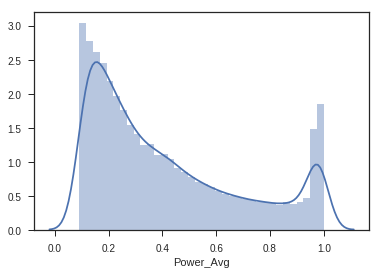

In [12]:
#sns.set_style("whitegrid")
sns.distplot(train.Power_Avg)
plt.legend();

No handles with labels found to put in legend.


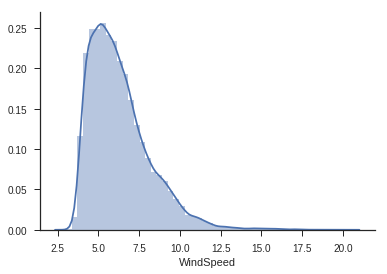

In [14]:
sns.distplot(train.iloc[:,1])
plt.legend()
sns.despine();

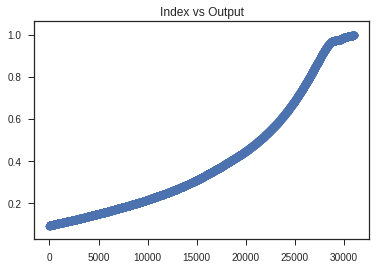

In [15]:
plt.scatter(x = np.arange(train.shape[0]), y =np.sort(train.Power_Avg))
plt.title("Index vs Output");

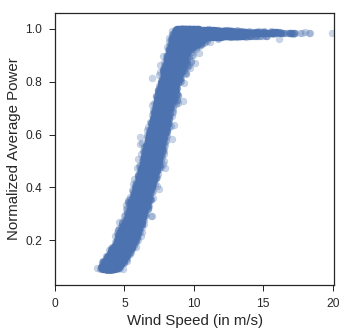

In [16]:
plt.figure(figsize = (5,5))
plt.scatter(x = train.iloc[:,1].values, y = train.Power_Avg , alpha=0.3)
#plt.title("WInd Speed vs Power Avg")
plt.xlabel("Wind Speed (in m/s)", fontsize = 15)
plt.ylabel("Normalized Average Power",fontsize = 15)
plt.xlim(0,20.1)
plt.tick_params(axis='both', which='major', labelsize=12)
#sns.despine()
#plt.savefig("F://JAY//COURSES//ISEN_619//Project/windspeed.eps",format='eps',  dpi=800);

In [0]:
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

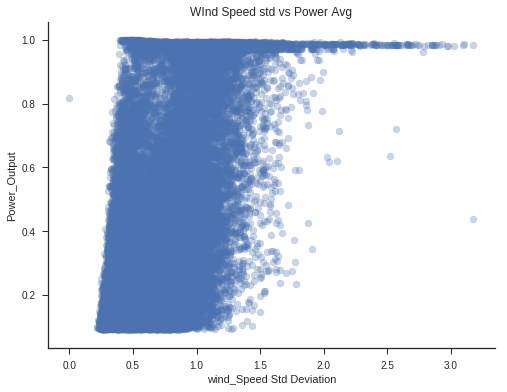

In [18]:
plt.figure(figsize = (8,6))
plt.scatter(x = train.iloc[:,2].values, y = train.Power_Avg , alpha=0.3)
plt.title("WInd Speed std vs Power Avg")
plt.xlabel("wind_Speed Std Deviation")
plt.ylabel("Power_Output")
sns.despine();

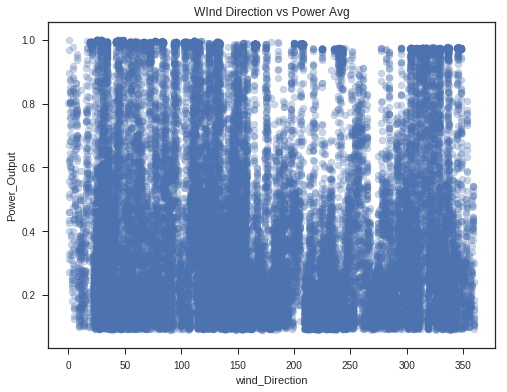

In [19]:
plt.figure(figsize = (8,6))
plt.scatter(x = np.sort(train.iloc[:,3].values), y = train.Power_Avg , alpha=0.3)
plt.title("WInd Direction vs Power Avg")
plt.xlabel("wind_Direction")
plt.ylabel("Power_Output");

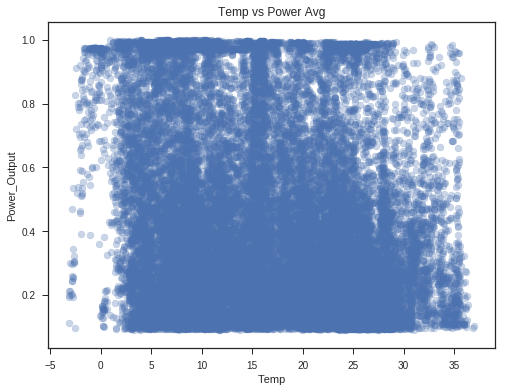

In [20]:
plt.figure(figsize = (8,6))
plt.scatter(x = train.iloc[:,4].values, y = train.Power_Avg , alpha=0.3)
plt.title("Temp vs Power Avg")
plt.xlabel("Temp")
plt.ylabel("Power_Output");

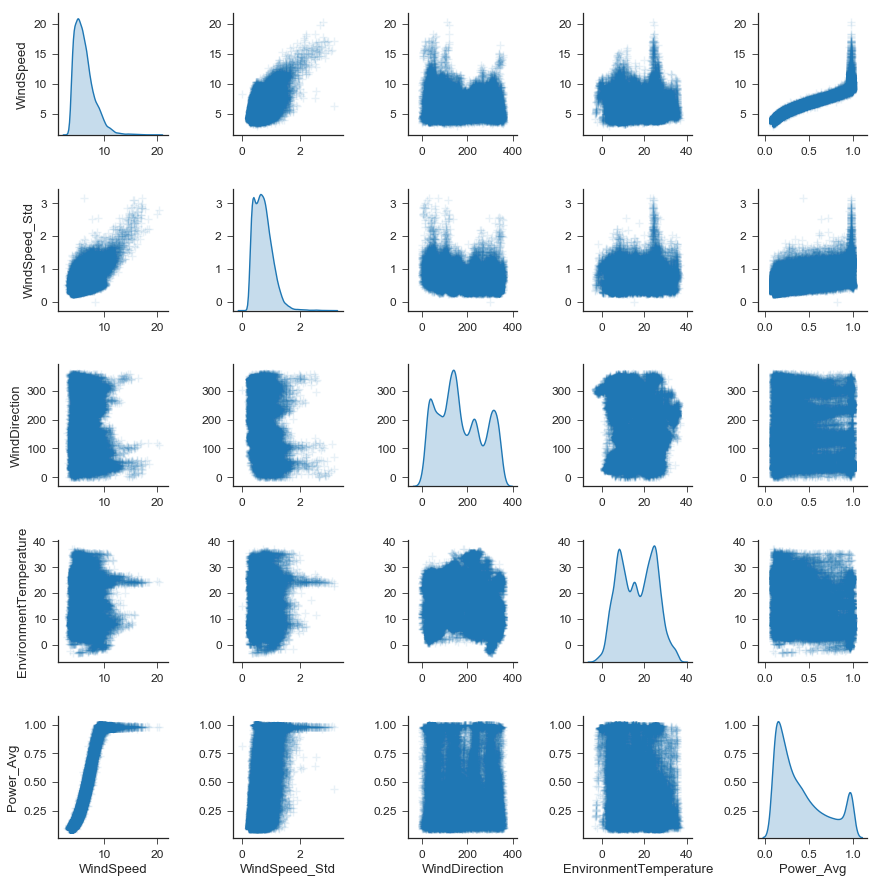

In [0]:
#sns.set_context(font_scale=1.5)
sns.set_context("paper",font_scale=1.5)
sns_plot= sns.pairplot(train.iloc[:,1:6],palette="husl" ,markers = '+', diag_kind = "kde",
             plot_kws=dict(s=50,alpha =0.1),
             diag_kws=dict(shade=True))
#sns_plot.savefig("F://JAY//COURSES//ISEN_619//Project/pairplot.eps", format='eps', dpi=600);

## Feature Engineering

In [21]:
train.head()

Time  WindSpeed  WindSpeed_Std  WindDirection  \
0 2015-01-01 00:10:00      8.025          0.504        327.346   
1 2015-01-01 00:20:00      8.946          0.540        330.198   
2 2015-01-01 00:30:00      9.147          0.480        334.323   
3 2015-01-01 00:40:00      8.561          0.673        335.525   
4 2015-01-01 00:50:00      7.578          0.384        334.049   

   EnvironmentTemperature  Power_Avg  
0                   1.170   0.803112  
1                   0.875   0.969471  
2                   0.876   1.000000  
3                   0.755   0.896077  
4                   0.531   0.669709

Each Month Add Some Random nature of the Predictive modeling

In [0]:
train['month']= train.Time.dt.month
test['month'] = test.Time.dt.month

From 9 am in the morning to the 9pm temperature of Soil will be Same that may affect the wind speed.

In [0]:
train['meridian'] = [1 if (hr <21 and hr >9) else 0 for hr in train.Time.dt.hour]
test['meridian'] = [1 if (hr <21 and hr >9) else 0 for hr in test.Time.dt.hour]

Converting this Variable into the Categorical

In [0]:
train['meridian'] = pd.Categorical(train['meridian'])
test['meridian'] = pd.Categorical(test['meridian'])

Wind Direction in its actual form is not useful for predictive modeling. This Wind Direction Can be devided in 4 new features. Each Feature belongs to each quadrant and corresponding value will be from 0 to 90 degree.

In [0]:
train['dir1'] = [dr if dr <= 90 else 0  for dr in train.WindDirection]
train['dir2'] = [dr-90 if (dr > 90 and dr <=180) else 0  for dr in train.WindDirection]
train['dir3'] = [dr-180 if (dr > 180 and dr <= 270) else 0  for dr in train.WindDirection]
train['dir4'] = [dr-270 if (dr > 270) else 0  for dr in train.WindDirection]

In [0]:
test['dir1'] = [dr if dr <= 90 else 0  for dr in test.WindDirection]
test['dir2'] = [dr-90 if (dr > 90 and dr <=180) else 0  for dr in test.WindDirection]
test['dir3'] = [dr-180 if (dr > 180 and dr <= 270) else 0  for dr in test.WindDirection]
test['dir4'] = [dr-270 if (dr > 270) else 0  for dr in test.WindDirection]

Wind Turbulance can be a new feature that can lead to important feature for predicting power output. This is directly related to wind speed.

In [0]:
train['terbulance'] = [std_spd/spd for spd , std_spd in zip(train['WindSpeed'], train['WindSpeed_Std'])]
test['terbulance'] = [std_spd/spd for spd, std_spd in zip(test['WindSpeed'],test["WindSpeed_Std"])]

Air density is similar feature that can be explored more.

In [0]:
train['airdensity'] = [(101000/(287*(temp+273.15))) for temp in train["EnvironmentTemperature"]]
test['airdensity'] = [(101000/(287*(temp+273.15))) for temp in test["EnvironmentTemperature"]]

In [29]:
train.head()

Time  WindSpeed  WindSpeed_Std  WindDirection  \
0 2015-01-01 00:10:00      8.025          0.504        327.346   
1 2015-01-01 00:20:00      8.946          0.540        330.198   
2 2015-01-01 00:30:00      9.147          0.480        334.323   
3 2015-01-01 00:40:00      8.561          0.673        335.525   
4 2015-01-01 00:50:00      7.578          0.384        334.049   

   EnvironmentTemperature  Power_Avg  month meridian  dir1  dir2  dir3  \
0                   1.170   0.803112      1        0   0.0   0.0   0.0   
1                   0.875   0.969471      1        0   0.0   0.0   0.0   
2                   0.876   1.000000      1        0   0.0   0.0   0.0   
3                   0.755   0.896077      1        0   0.0   0.0   0.0   
4                   0.531   0.669709      1        0   0.0   0.0   0.0   

     dir4  terbulance  airdensity  
0  57.346    0.062804    1.282868  
1  60.198    0.060362    1.284249  
2  64.323    0.052476    1.284244  
3  65.525    0.078612    1.284812  
4  64.049    0.050673    1.285863

Here we are vaildating our assumption about our features and how that can lead to better prediction

In [30]:
train[['month', 'EnvironmentTemperature' ,'WindSpeed','Power_Avg']].groupby('month').mean()

EnvironmentTemperature  WindSpeed  Power_Avg
month                                              
1                    6.402845   6.188828   0.433644
2                    7.346446   6.137140   0.442499
3                   10.804647   6.166673   0.422591
4                   15.564134   6.665079   0.485776
5                   20.508233   6.209381   0.402675
6                   25.128433   6.263535   0.396453
7                   27.239749   6.233260   0.339191
8                   28.922158   6.244510   0.358870
9                   25.290655   6.038740   0.342885
10                  20.943053   6.034052   0.348144
11                  13.338470   6.908430   0.474369
12                   8.428433   6.372287   0.418486

In [0]:
train[['meridian', 'EnvironmentTemperature' ,'WindSpeed','Power_Avg']].groupby('meridian').mean()

EnvironmentTemperature  WindSpeed  Power_Avg
meridian                                              
0                      15.675177   6.332790   0.417044
1                      18.089771   6.270908   0.402450

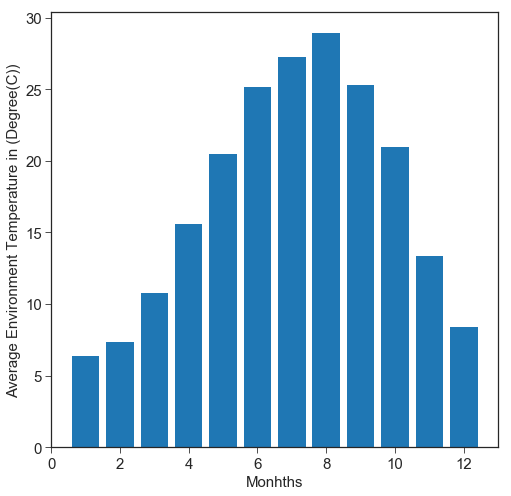

In [0]:
bardata = train[['month', 'EnvironmentTemperature']].groupby('month').mean()
plt.figure(figsize = (8,8))
plt.bar(bardata.index, bardata.EnvironmentTemperature.values)
plt.xlabel("Monhths", fontsize = 15)
plt.ylabel("Average Environment Temperature in (Degree(C))",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.savefig("F://JAY//COURSES//ISEN_619//Project/avgtempvsmonth.eps", format='eps', dpi=600);

From above figure we can clearly see that each month has different temperature. This also make sense as wind speed are directly co- related with it. As From above figure we can also see that using this features we might reduce our predictive varaince.

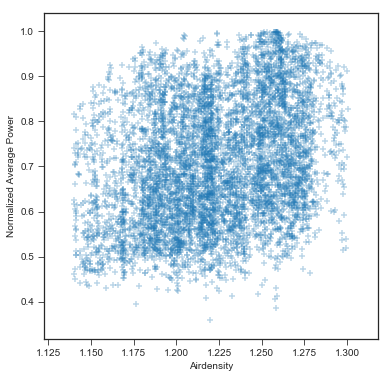

In [0]:
#plt.scatter(train.airdensity, train.Power_Avg,alpha =0.2,marker ="+");
temp = train[(train.WindSpeed<9) & (train.WindSpeed >7)]
plt.figure(figsize = (6,6))
plt.scatter(temp.airdensity, temp.Power_Avg,alpha =0.3,marker ="+")
plt.xlabel("Airdensity")
plt.ylabel("Normalized Average Power")
#plt.savefig("F://JAY//COURSES//ISEN_619//Project/airdensity_forWindsp_btw_7_9.eps", format='eps', dpi=1000);

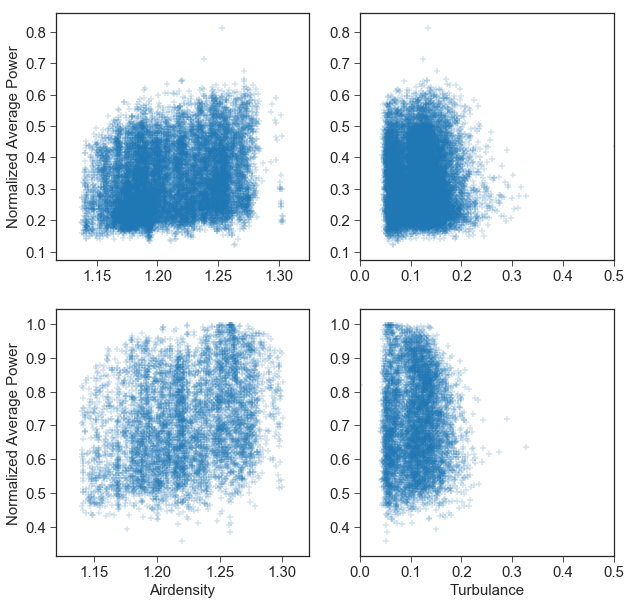

In [0]:
#fig, ax = plt.subplots(2, 2,figsize = (12,12))
temp = train[(train.WindSpeed<7) & (train.WindSpeed >5)]

plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1)
plt.scatter(temp.airdensity, temp.Power_Avg,alpha =0.2,marker ="+")
#plt.xlabel("Airdensity")
plt.ylabel("Normalized Average Power",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplot(2, 2, 2)
plt.scatter(temp.terbulance, temp.Power_Avg,alpha =0.2,marker ="+")
#plt.xlabel("Turbulance")
#plt.ylabel("Normalized Average Power")
plt.xlim(0,.5)
plt.tick_params(axis='both', which='major', labelsize=15)
temp = train[(train.WindSpeed<9) & (train.WindSpeed >7)]
plt.subplot(2, 2, 3)
plt.scatter(temp.airdensity, temp.Power_Avg,alpha =0.2,marker ="+")
plt.xlabel("Airdensity",fontsize = 15)
plt.ylabel("Normalized Average Power",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplot(2, 2, 4)
plt.scatter(temp.terbulance, temp.Power_Avg,alpha =0.2,marker ="+")
plt.xlabel("Turbulance", fontsize = 15)
#plt.ylabel("Normalized Average Power")
plt.xlim(0,.5)
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.savefig("F://JAY//COURSES//ISEN_619//Project/airdensity&terb_forWindsp_btw_5_7&7_9.eps", format='eps', dpi=1000);

 We can see if there is correlation between each rows. This can determine if we have to use time series prediction or without it.

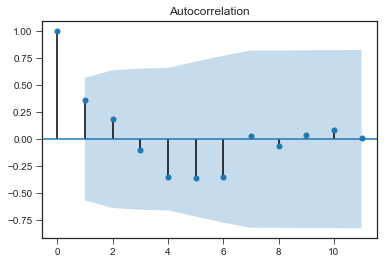

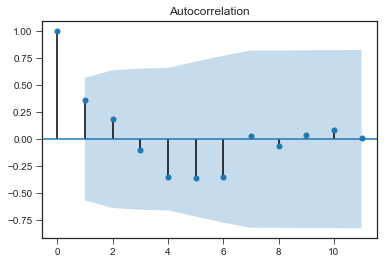

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
temp = train[['month', 'EnvironmentTemperature' ,'WindSpeed','Power_Avg']].groupby('month').mean()
series = temp.Power_Avg
plot_acf(series)

In [31]:
test.head()

Time  WindSpeed  WindSpeed_Std  WindDirection  \
0 2016-01-01 02:20:00      4.317          0.268        199.312   
1 2016-01-01 02:30:00      4.266          0.299        192.022   
2 2016-01-01 02:40:00      4.576          0.258        194.306   
3 2016-01-01 02:50:00      4.479          0.250        195.993   
4 2016-01-01 03:00:00      4.250          0.309        198.886   

   EnvironmentTemperature  Power  month meridian  dir1  dir2    dir3  dir4  \
0                   4.612    NaN      1        0   0.0   0.0  19.312   0.0   
1                   4.760    NaN      1        0   0.0   0.0  12.022   0.0   
2                   4.883    NaN      1        0   0.0   0.0  14.306   0.0   
3                   4.800    NaN      1        0   0.0   0.0  15.993   0.0   
4                   4.802    NaN      1        0   0.0   0.0  18.886   0.0   

   terbulance  airdensity  
0    0.062080    1.266971  
1    0.070089    1.266296  
2    0.056381    1.265736  
3    0.055816    1.266114  
4    0.072706    1.266105

In [32]:
test.dtypes

Time                      datetime64[ns]
WindSpeed                        float64
WindSpeed_Std                    float64
WindDirection                    float64
EnvironmentTemperature           float64
Power                            float64
month                              int64
meridian                        category
dir1                             float64
dir2                             float64
dir3                             float64
dir4                             float64
terbulance                       float64
airdensity                       float64
dtype: object

In [33]:
train.columns, test.columns

(Index(['Time', 'WindSpeed', 'WindSpeed_Std', 'WindDirection',
        'EnvironmentTemperature', 'Power_Avg', 'month', 'meridian', 'dir1',
        'dir2', 'dir3', 'dir4', 'terbulance', 'airdensity'],
       dtype='object'),
 Index(['Time', 'WindSpeed', 'WindSpeed_Std', 'WindDirection',
        'EnvironmentTemperature', 'Power', 'month', 'meridian', 'dir1', 'dir2',
        'dir3', 'dir4', 'terbulance', 'airdensity'],
       dtype='object'))

We do not have test dataset's prediction values. BUt we can see the distribution of it and how it relates to train data. This is not useful in the real world but can easily be explored in this type of projects.

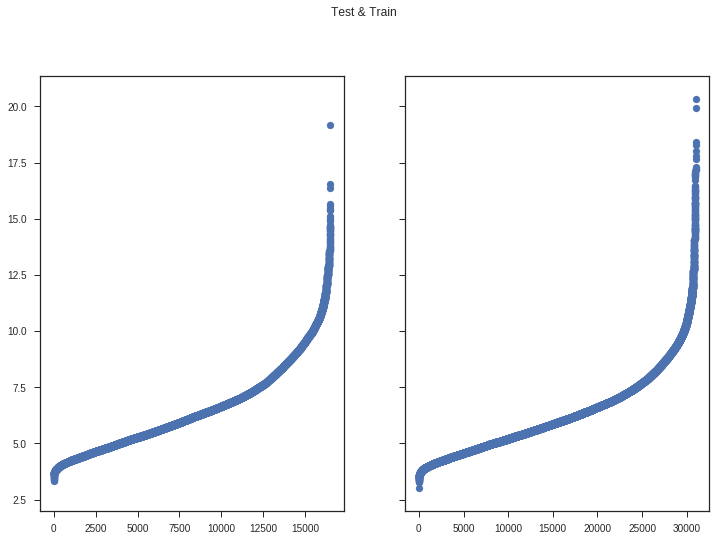

In [34]:
fig, ax = plt.subplots(1,2, sharey = 'row', figsize = (12,8))
ax[0].scatter(x = np.arange(len(test)), y = np.sort(test.WindSpeed.values))
fig.suptitle("Test", x = 0.2, y = 1)
ax[1].scatter(x = np.arange(len(train)), y = np.sort(train.WindSpeed.values))
fig.suptitle("Test & Train", x = 0.5, y = 1);

In [35]:
train.head()

Time  WindSpeed  WindSpeed_Std  WindDirection  \
0 2015-01-01 00:10:00      8.025          0.504        327.346   
1 2015-01-01 00:20:00      8.946          0.540        330.198   
2 2015-01-01 00:30:00      9.147          0.480        334.323   
3 2015-01-01 00:40:00      8.561          0.673        335.525   
4 2015-01-01 00:50:00      7.578          0.384        334.049   

   EnvironmentTemperature  Power_Avg  month meridian  dir1  dir2  dir3  \
0                   1.170   0.803112      1        0   0.0   0.0   0.0   
1                   0.875   0.969471      1        0   0.0   0.0   0.0   
2                   0.876   1.000000      1        0   0.0   0.0   0.0   
3                   0.755   0.896077      1        0   0.0   0.0   0.0   
4                   0.531   0.669709      1        0   0.0   0.0   0.0   

     dir4  terbulance  airdensity  
0  57.346    0.062804    1.282868  
1  60.198    0.060362    1.284249  
2  64.323    0.052476    1.284244  
3  65.525    0.078612    1.284812  
4  64.049    0.050673    1.285863

In [36]:
test.head()

Time  WindSpeed  WindSpeed_Std  WindDirection  \
0 2016-01-01 02:20:00      4.317          0.268        199.312   
1 2016-01-01 02:30:00      4.266          0.299        192.022   
2 2016-01-01 02:40:00      4.576          0.258        194.306   
3 2016-01-01 02:50:00      4.479          0.250        195.993   
4 2016-01-01 03:00:00      4.250          0.309        198.886   

   EnvironmentTemperature  Power  month meridian  dir1  dir2    dir3  dir4  \
0                   4.612    NaN      1        0   0.0   0.0  19.312   0.0   
1                   4.760    NaN      1        0   0.0   0.0  12.022   0.0   
2                   4.883    NaN      1        0   0.0   0.0  14.306   0.0   
3                   4.800    NaN      1        0   0.0   0.0  15.993   0.0   
4                   4.802    NaN      1        0   0.0   0.0  18.886   0.0   

   terbulance  airdensity  
0    0.062080    1.266971  
1    0.070089    1.266296  
2    0.056381    1.265736  
3    0.055816    1.266114  
4    0.072706    1.266105

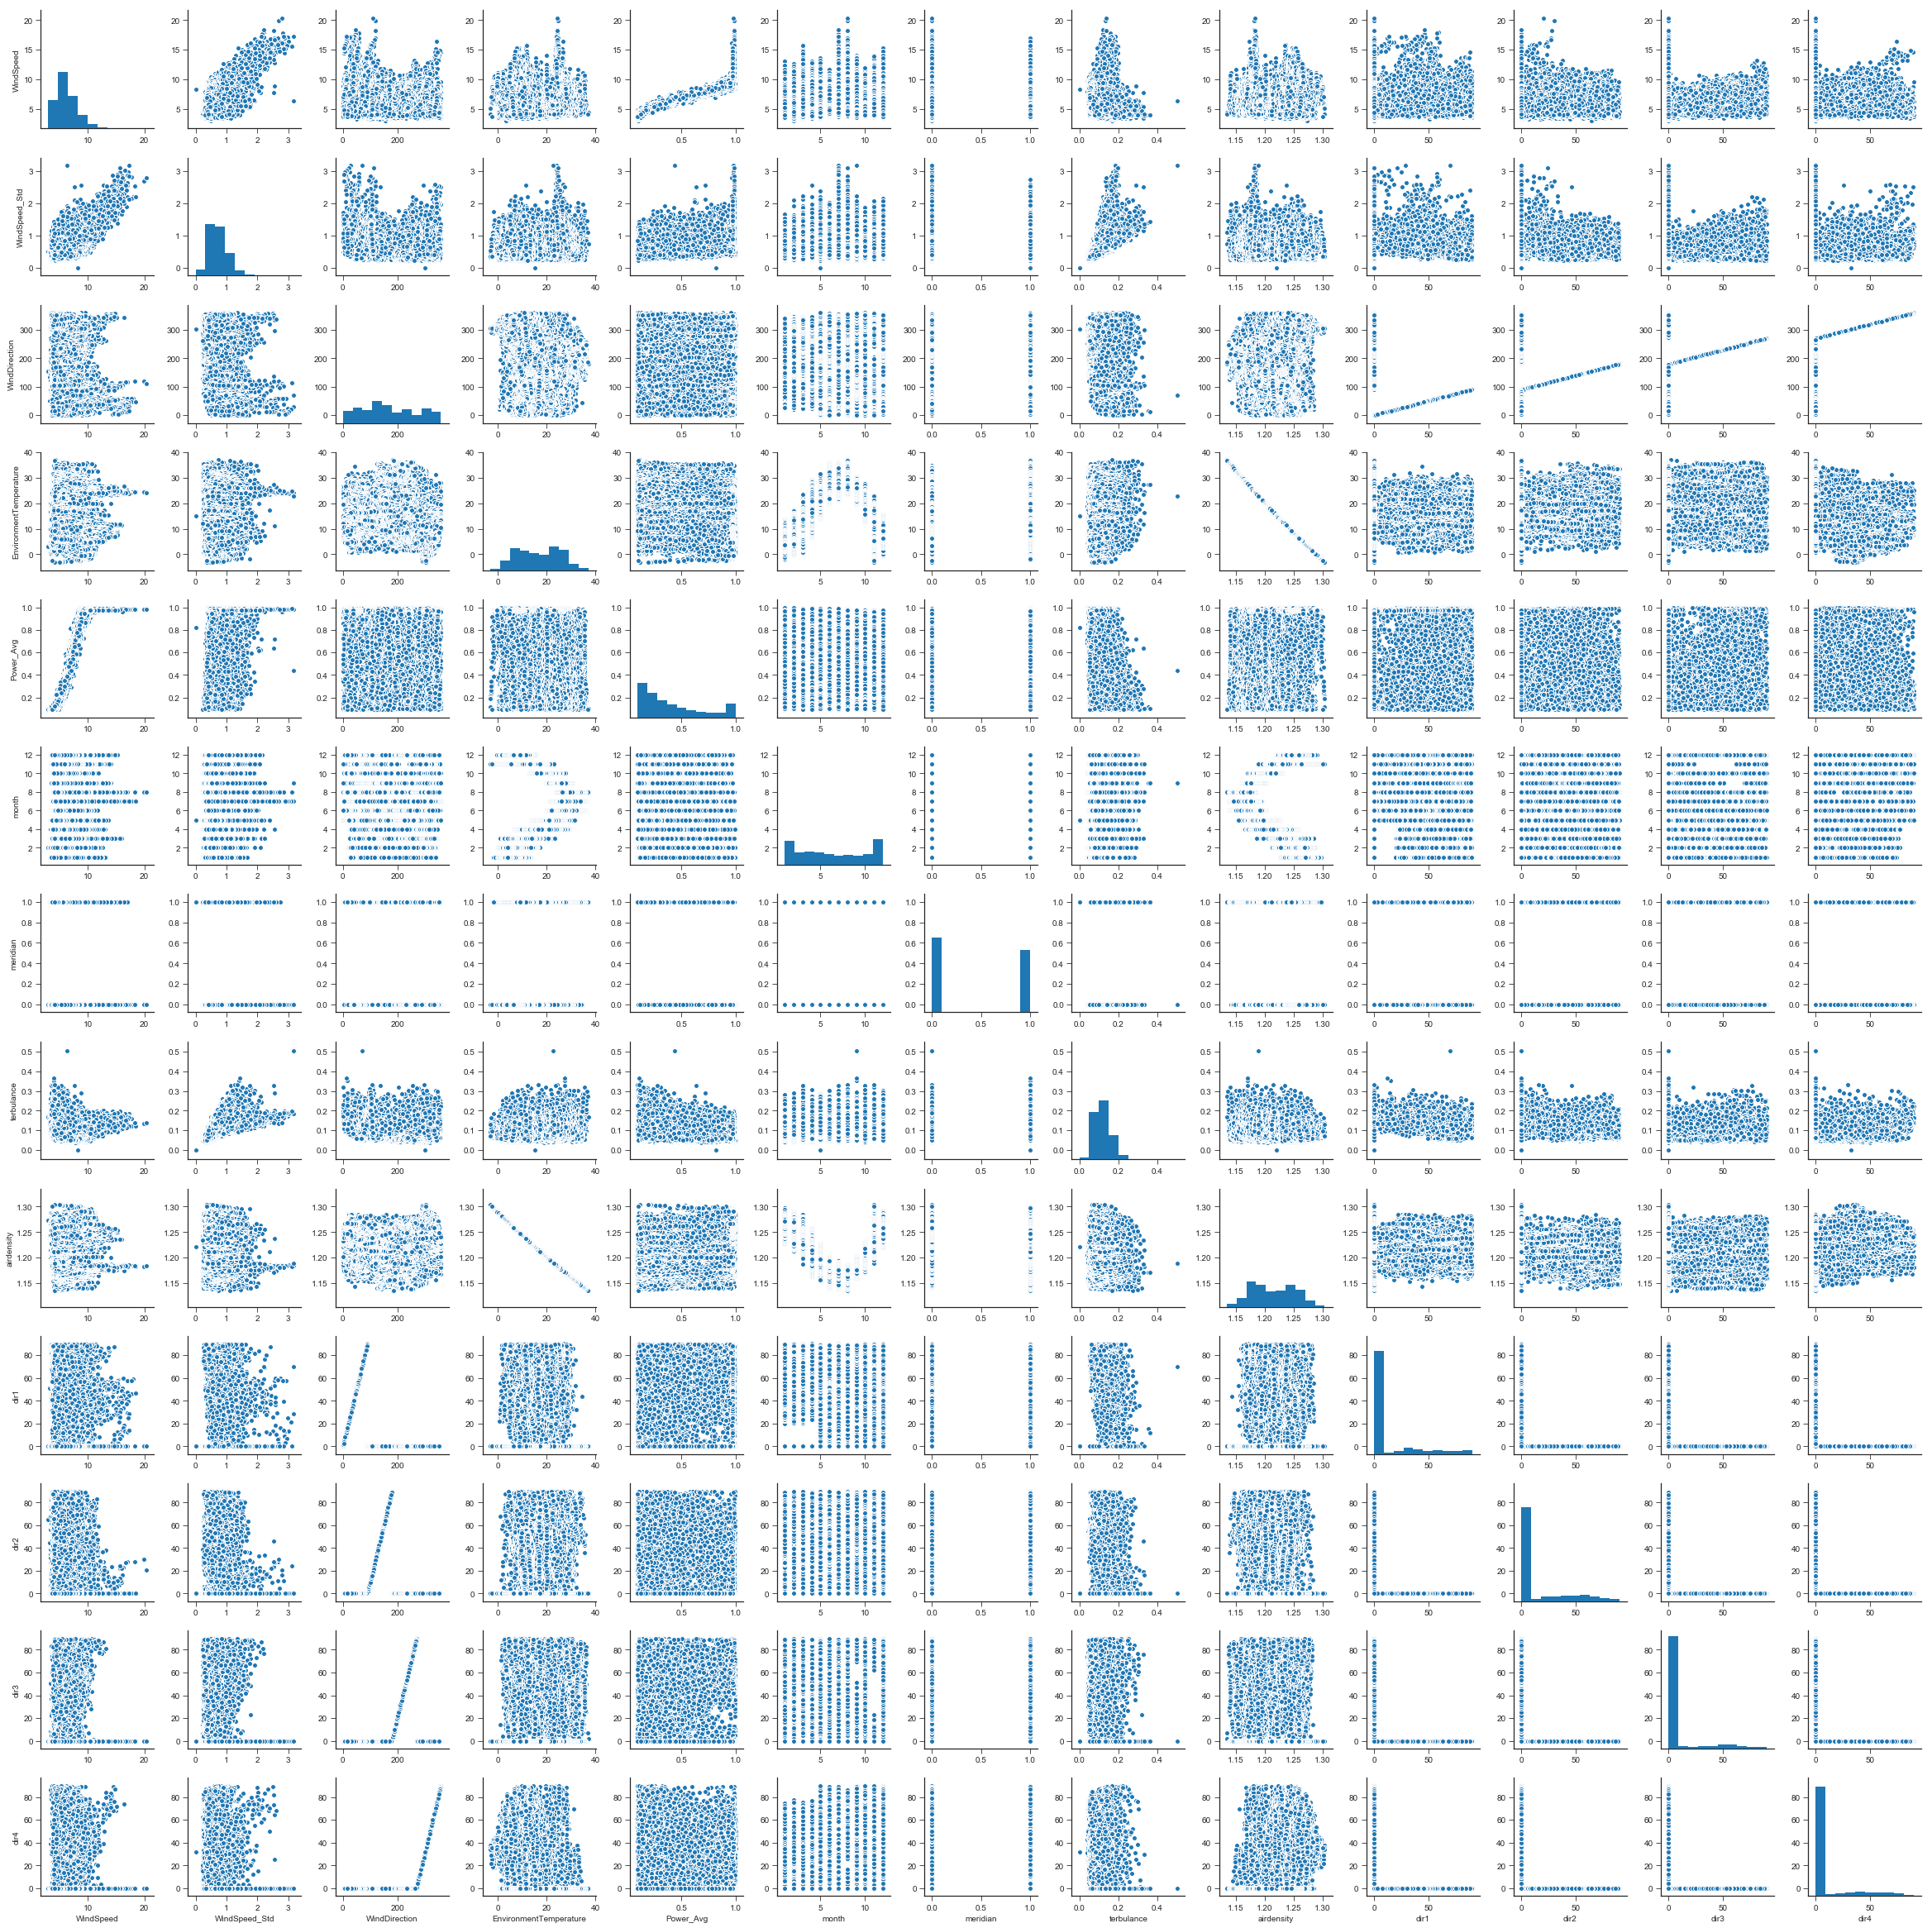

In [0]:
sns.pairplot(train,palette="husl");

Here, We are tring to explore wind direction and how it can be used in the predictive modeiling type problems. Previously we have shown different feature but can explored more. 

In [0]:
import math

math.radians(360)
rad = [math.radians(wd) for wd in train["WindDirection"]]


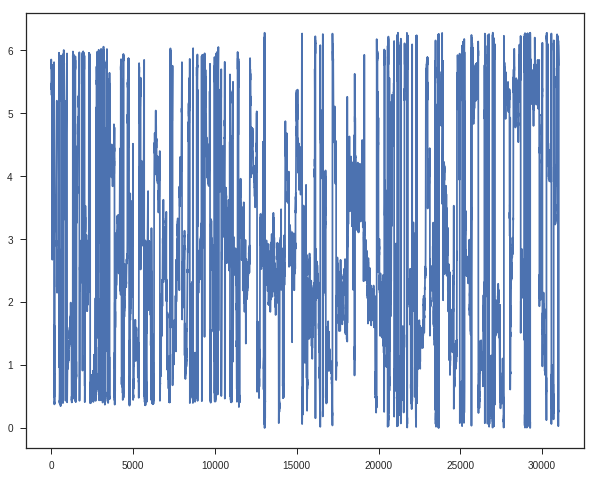

In [38]:
plt.figure(figsize = (10,8))
plt.plot(np.arange(len(rad)), rad);

In [39]:
plt.figure(figsize = (10,8))
plt.scatter(np.arange(len(rad)), train["WindDirection"], alpha = .5);

In [0]:
rad_sin = [math.sin(wd) for wd in train["WindDirection"]]
rad_cos = [math.cos(wd) for wd in train["WindDirection"]]
rad_tan = [math.tan(wd) for wd in train["WindDirection"]]

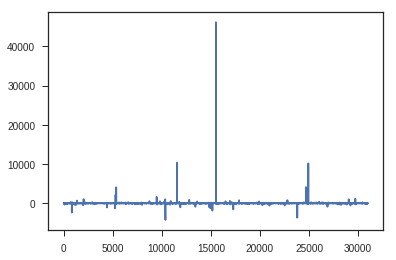

In [41]:
plt.plot(np.arange(len(rad)), rad_tan);

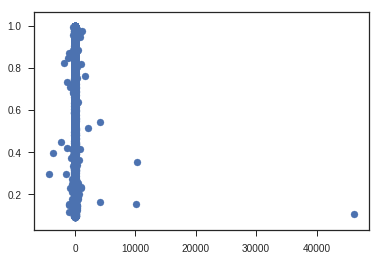

In [42]:
plt.scatter(rad_tan,train["Power_Avg"]);

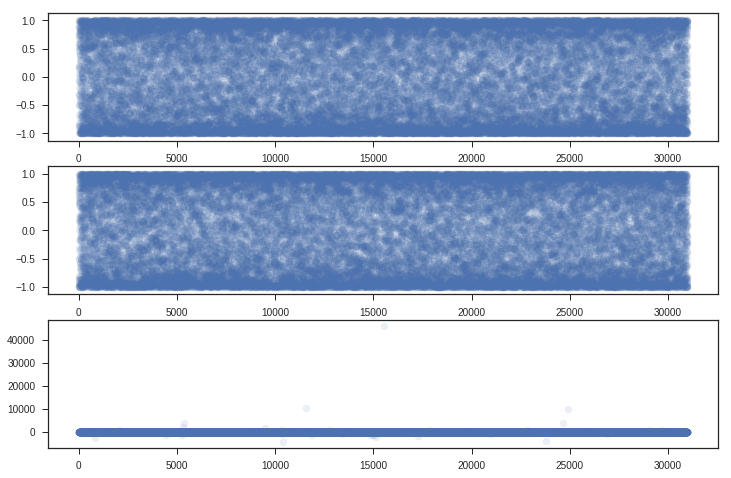

In [43]:
plt.figure(figsize = (12,8))
fig, ax = plt.subplots(3,1,figsize = (12,8))
ax[0].scatter(np.arange(len(rad)), rad_sin, alpha = 0.1)
ax[1].scatter(np.arange(len(rad)), rad_cos, alpha = 0.1)
ax[2].scatter(np.arange(len(rad)), rad_tan, alpha = 0.1);

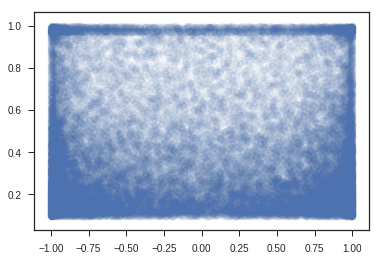

In [44]:
plt.scatter(rad_sin, train["Power_Avg"], alpha = 0.05);

Creating X matrix and y vector

In [0]:
ytrain = train["Power_Avg"]
xtrain = train.drop(["Power_Avg","Time"], axis =1)
test_time = test["Time"]
xtest = test.drop(["Time","Power"], axis = 1)

In [49]:
xtrain.head(),xtest.head()

(   WindSpeed  WindSpeed_Std  WindDirection  EnvironmentTemperature  month  \
 0      8.025          0.504        327.346                   1.170      1   
 1      8.946          0.540        330.198                   0.875      1   
 2      9.147          0.480        334.323                   0.876      1   
 3      8.561          0.673        335.525                   0.755      1   
 4      7.578          0.384        334.049                   0.531      1   
 
   meridian  dir1  dir2  dir3    dir4  terbulance  airdensity  
 0        0   0.0   0.0   0.0  57.346    0.062804    1.282868  
 1        0   0.0   0.0   0.0  60.198    0.060362    1.284249  
 2        0   0.0   0.0   0.0  64.323    0.052476    1.284244  
 3        0   0.0   0.0   0.0  65.525    0.078612    1.284812  
 4        0   0.0   0.0   0.0  64.049    0.050673    1.285863  ,
    WindSpeed  WindSpeed_Std  WindDirection  EnvironmentTemperature  month  \
 0      4.317          0.268        199.312                   4.612

In [50]:
for column in xtrain.columns:
  print(column, xtrain[column].unique())

WindSpeed [8.025 8.946 9.147 ... 8.57  8.715 3.514]
WindSpeed_Std [0.504 0.54  0.48  ... 1.784 1.471 0.249]
WindDirection [327.346 330.198 334.323 ...  15.118  14.537  16.09 ]
EnvironmentTemperature [1.17  0.875 0.876 ... 8.591 9.248 9.163]
month [ 1  2  3  4  5  6  7  8  9 10 11 12]
meridian [0, 1]
Categories (2, int64): [0, 1]
dir1 [ 0.    72.206 79.25  ... 15.118 14.537 16.09 ]
dir2 [ 0.    67.155 63.321 ... 15.119 16.293 15.628]
dir3 [ 0.     8.752 48.938 ... 56.198 82.66  83.878]
dir4 [57.346 60.198 64.323 ... 60.015 65.013 82.628]
terbulance [0.06280374 0.06036217 0.05247622 ... 0.18533201 0.22754491 0.25864553]
airdensity [1.2828681  1.28424916 1.28424447 ... 1.24907761 1.24617163 1.24654683]


# Linear Regression

The project task was given with baseline prediction with IEC Bining Method. We have not replicated the method as that method do not explicitly says about the what kind of bin they have used to get 0.0453 RMSE value. We have used Linear Regression as our Baseline Method. 

LInear Regression can be performed using multiple library in python. Using Stats model and Scikit- learn API. 
In this Project Our Focus was on 10 Fold Cross - Validated RMSE Value. We First used Stats model to understand the additive relationship with the response. And used scikit learn API to get Cross- Validated Results

First converting Pandas DataFrame into NUMPY array

In [4]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)

(30997, 11) (30997,)


Building model without any constant

- x1 = WindSpeed 
- x2 = WindSpeed_Std 
- x3 = WindDirection 
- x4 = EnvironmentTemperature 
- x5 = terbulance 
- x6 = airdensity 
- x7 = 
- x8 = 
- x9 = 
- x10 = 
- x11 = 



-----
Describing model 
----
And Explain next step


In [0]:
model = sm.OLS(y, X, hasconst = True)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 6.793e+04
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:20:18   Log-Likelihood:                 34258.
No. Observations:               30997   AIC:                        -6.850e+04
Df Residuals:                   30991   BIC:                        -6.845e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1820      0.001    215.723      0.0

In [0]:
#kf10 = KFold(n_splits = 10) 
#kf10.get_n_splits(np.array(train.values))
#print(kf10)
#X = np.array(train.values)
#kf10.split(X)

In [0]:

gajb = (np.ones((30997,1)),X)
X = np.hstack(gajb)

model = sm.OLS(y, X, hasconst = True)
results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 5.676e+04
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:20:18   Log-Likelihood:                 34298.
No. Observations:               30997   AIC:                        -6.858e+04
Df Residuals:                   30990   BIC:                        -6.852e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2069      0.585     -8.899      0.0

In [0]:
je = np.ones((30997,1))

X[:,2:7].shape,X[:,1].shape, je.shape

((30997, 5), (30997,), (30997, 1))

In [0]:
X[:,1].reshape(30997,1)

array([[ 8.025],
       [ 8.946],
       [ 9.147],
       ..., 
       [ 4.036],
       [ 3.674],
       [ 4.164]])

In [0]:
gajab = (np.ones((30997,1)), X[:,1].reshape(30997,1),X[:,1].reshape(30997,1)**2,X[:,1].reshape(30997,1)**3,X[:,2:7])
X = np.hstack(gajab)
X.shape

model = sm.OLS(y, X, hasconst = True)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 9.313e+04
Date:                Mon, 09 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:20:18   Log-Likelihood:                 45713.
No. Observations:               30997   AIC:                        -9.141e+04
Df Residuals:                   30988   BIC:                        -9.133e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9231      0.405     -7.210      0.0

In [0]:
X.shape

(30997, 9)

In [0]:
xtrain.describe()

WindSpeed  WindSpeed_Std  WindDirection  EnvironmentTemperature  \
count  30997.000000   30997.000000   30997.000000            30997.000000   
mean       6.304619       0.736039     170.119863               16.774391   
std        1.860360       0.318567      98.435199                8.498041   
min        3.022000       0.000000       0.039000               -3.201000   
25%        4.933000       0.490000      88.665000                9.129000   
50%        5.932000       0.697000     152.230000               16.678000   
75%        7.235000       0.919000     247.567000               24.086000   
max       20.336000       3.175000     359.957000               36.992000   

         terbulance    airdensity  
count  30997.000000  30997.000000  
mean       0.118619      1.214865  
std        0.042646      0.035633  
min        0.000000      1.134694  
25%        0.084650      1.183963  
50%        0.116838      1.214225  
75%        0.145548      1.246697  
max        0.503808      1.303640

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import linear_model

reg = linear_model.LinearRegression(normalize = True)

#simple Linear regression without any complicated features
X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
print(X.shape, y.shape)


from sklearn.model_selection import KFold
kf = KFold(n_splits=10)


score = cross_val_score(reg, X, y, cv=kf,scoring = "neg_mean_squared_error")

print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 4) (30997, 1)
cv_rmse 0.08386621583546564


In [0]:
X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
gajab = (np.ones((30997,1)), X[:,1].reshape(30997,1),X[:,1].reshape(30997,1)**2,X[:,1].reshape(30997,1)**3,X[:,2:7])
X = np.hstack(gajab)
print(X.shape, y.shape)
reg = linear_model.LinearRegression(normalize = False, fit_intercept=False)
score = cross_val_score(reg, X, y, cv=kf,scoring = "neg_mean_squared_error")

print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 6) (30997, 1)
cv_rmse 0.22521709476058413


As so far we have not used and scaled features in the modeling. In linear Regression scaling doesn't help as that will only adjust the coefficient values. This result vaidate this fact.

## Scaled Regression

In [0]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
scaler = StandardScaler()
scaler2 = MinMaxScaler()

In [0]:
#preparing the dataset
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)

model = sm.OLS(y, X)
results = model.fit()
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print(results.summary())

(30997, 6) (30997,)
(30997, 6) (30997,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.921e+05
Date:                Thu, 12 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:47:54   Log-Likelihood:                 34258.
No. Observations:               30997   AIC:                        -6.850e+04
Df Residuals:                   30991   BIC:                        -6.845e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          

In [0]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print(X.mean())

reg = linear_model.LinearRegression(normalize = False, fit_intercept=False)
score = cross_val_score(reg, X, y, cv=kf,scoring = "neg_mean_squared_error")

print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 6) (30997,)
0.35015639583
cv_rmse 0.0818396399781


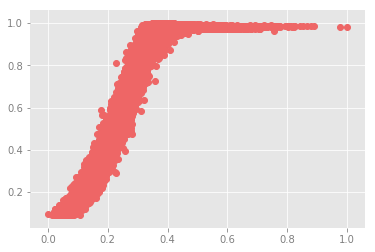

In [0]:
plt.scatter(x = X[:,0].reshape(30997, 1), y = y.reshape(30997, 1))

In [0]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
print(X.mean())

reg = linear_model.LinearRegression(normalize = False, fit_intercept=False)
score = cross_val_score(reg, X, y, cv=kf,scoring = "neg_mean_squared_error")

print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 6) (30997,)
32.5447327267
cv_rmse 0.0818268788909


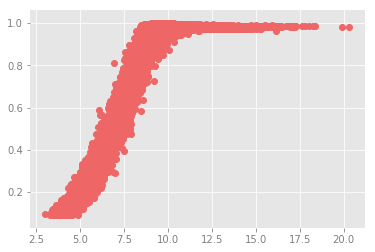

In [0]:
plt.scatter(x = X[:,0].reshape(30997, 1), y = y.reshape(30997, 1))

In [0]:
#gajab = (xtrain.iloc[:,[0,1,3,4,5]].values, np.array(rad_tan).reshape(30997, 1))
#X = np.hstack(gajab)
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
print(X.mean())

reg = linear_model.LinearRegression(normalize = False, fit_intercept=False)
score = cross_val_score(reg, X, y, cv=kf,scoring = "neg_mean_squared_error")

print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 5) (30997,)
5.02970672626353
cv_rmse 0.08184860655712305


To see if our model is performing we can use predicted vs truth graph to see that. This Can be seen Below. We are going to use train and test split to see this results

In [0]:
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression(normalize = False, fit_intercept=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,
                                                    random_state=42)
#print(X_train.shape, X_test.shape)
reg.fit(X_train,y_train)
pred = reg.predict(X_test)

In [0]:
print(X_train.shape, X_test.shape)

In [0]:
reg.fit(X_train,y_train)
pred = reg.predict(X_test)

In [0]:
from google.colab import files

In [0]:
#sns.set_style("ticks")
plt.figure(figsize = (5,5))
plt.scatter(y_test, pred)
plt.xlim(0,2.25)
plt.ylim(0,2.25)
plt.plot([0,2.5],[0,2.5],'r')
plt.xlabel("True Power Average",fontsize = 15)
plt.ylabel("predicted Power Average",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig("Linear_reg_pred.eps",format='eps',  dpi=800)
files.download("Linear_reg_pred.eps")

 Explain the graph

KNN is another method that can be use as a baseline that can be explored. As KNN is a non parametric method that uses distance based method to find prediction using average prediction of K neighbours.

Usually K values that are taken in the model buildings are 5 or 10. 
KNN Scikit learn function provides 2 type of weights to be include in the model
1. Uniform
2. Distance


# KNN

In [6]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'uniform')

X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
print(X.shape, y.shape)

score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 11) (30997, 1)
cv_rmse 0.16928811528545765


Knn performing worse than the Linear Regression that is strange. 
KNN is distance based method so scalling of the variables do matter.

In [7]:
## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print(X.mean())

score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
0.2807787125838118
cv_rmse 0.13642102947507415


In [8]:
## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print(X.mean())

score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
-3.1075186970160205e-16
cv_rmse 0.0716262369678297


- With standardizing data liner regression didn't give any improvement. But, KNN showed more improvement. 
- This make sense, as we know knn is distance based approch. 
- So, all the methods having distance based approch should give imporvement with scaling
- With normal scaling there is more improvement in the results in the case of knn not in liner regression. In linear regression case it's opposite of that

Let's See what happens if we increse the K to 10. with Uniform weight.

---

In [9]:
X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
print(X.shape, y.shape)
print("Without standardizing", X.mean())

knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'uniform')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 11) (30997, 1)
Without standardizing 7.118684453245852
cv_rmse 0.17858203592811367


In [10]:
## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())

knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'uniform')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
With 0-1 standardizing 0.2807787125838118
cv_rmse 0.13916111727259142


In [11]:
## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'uniform')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
with normal standardizing -3.1075186970160205e-16
cv_rmse 0.07177203423478365


With Increasing K to 10 prediction remains same.
Let's Explore weight = Distance.

---

In [12]:
X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
print(X.shape, y.shape)
print("Without standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 11) (30997, 1)
Without standardizing 7.118684453245852
cv_rmse 0.1668857549742648
(30997, 11) (30997,)
with normal standardizing -3.1075186970160205e-16


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


cv_rmse 0.0708639462584745
(30997, 11) (30997,)
With 0-1 standardizing 0.2807787125838118


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


cv_rmse 0.1354923442660087


This Perform slight better than the Uniform Weight.
This explain important findings about the fetures as that the data points that are near to the data points are and some far data point is still important for the prediction using KNN

Let's Increase the Value of K to 10

In [13]:
X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
print(X.shape, y.shape)
print("Without standardizing", X.mean())
kknn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


(30997, 11) (30997, 1)
Without standardizing 7.118684453245852
cv_rmse 0.1668857549742648
(30997, 11) (30997,)
with normal standardizing -3.1075186970160205e-16


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


cv_rmse 0.0707127570610512
(30997, 11) (30997,)
With 0-1 standardizing 0.2807787125838118


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


cv_rmse 0.1378104127839298


k = 1 Nearest Neighbour method is unbiased method but has high variance. This results are explains in the following results

In [16]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 1, weights = 'distance')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

cv_rmse 0.1455422781513887


In [17]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 1, weights = 'uniform')
score = cross_val_score(knn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

cv_rmse 0.1455422781513887


Validation Curve is an Important method to see the overfitting or underfitting of model respect to specific parameter. and also used to find the optimum parameter that optimize the cost function

Here we are using scikit learn module and built custom function for that resulting cv results 

## Ploting Validation Curve

In [5]:
from sklearn.learning_curve import validation_curve


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [0]:
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    plt.figure(figsize = (8,6))
    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")

def plot_validation_rmse_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(np.sqrt(np.abs(train_scores)), axis=1)
    train_scores_std = np.std(np.sqrt(np.abs(train_scores)), axis=1)
    validation_scores_mean = np.mean(np.sqrt(np.abs(validation_scores)), axis=1)
    validation_scores_std = np.std(np.sqrt(np.abs(validation_scores)), axis=1)
    plt.figure(figsize = (8,8))
    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="b")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="b",
             label="Cross-validation score")
    plt.ylim(train_scores_mean.min()-0.01, validation_scores_mean.max()+0.01)
    plt.legend(loc="best")

---

(30997, 11) (30997, 1)
Without standardizing 7.118684453245852


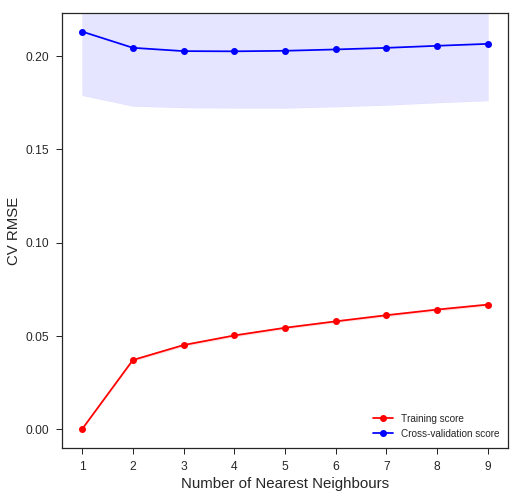

In [21]:
X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
print(X.shape, y.shape)
print("Without standardizing", X.mean())
training_scores, validation_scores = validation_curve(neighbors.KNeighborsRegressor(weights = 'uniform'),
                                                      X, y, param_name="n_neighbors", param_range=range(1, 10), cv=5,
                                                      scoring = "neg_mean_squared_error")
plot_validation_rmse_curve(range(1, 10), training_scores, validation_scores)
plt.xlabel("Number of Nearest Neighbours",fontsize = 15)
plt.ylabel("CV RMSE",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=12)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
with normal standardizing -3.1075186970160205e-16


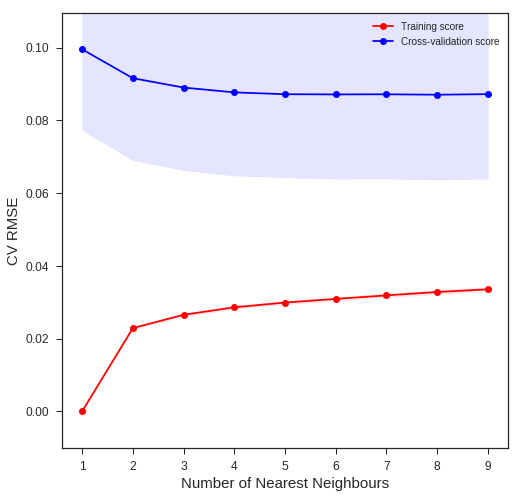

In [22]:
## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())

training_scores, validation_scores = validation_curve(neighbors.KNeighborsRegressor(weights = 'uniform'),
                                                      X, y, param_name="n_neighbors", param_range=range(1, 10), cv=5,
                                                      scoring = "neg_mean_squared_error")
plot_validation_rmse_curve(range(1, 10), training_scores, validation_scores)
plt.xlabel("Number of Nearest Neighbours",fontsize = 15)
plt.ylabel("CV RMSE",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=12)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
With 0-1 standardizing 0.2807787125838118


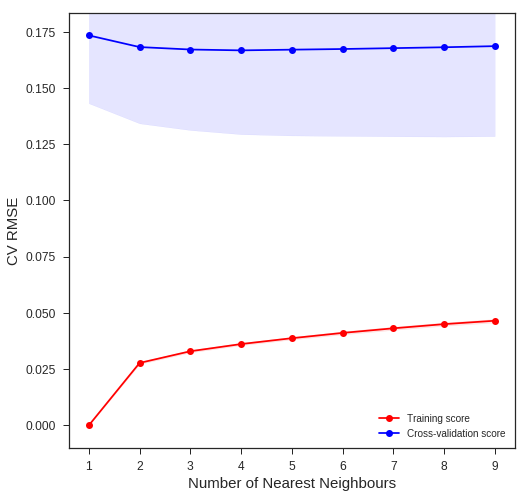

In [23]:
## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
training_scores, validation_scores = validation_curve(neighbors.KNeighborsRegressor(weights = 'uniform'),
                                                      X, y, param_name="n_neighbors", param_range=range(1, 10), cv=5,
                                                      scoring = "neg_mean_squared_error")
plot_validation_rmse_curve(range(1, 10), training_scores, validation_scores)
plt.xlabel("Number of Nearest Neighbours",fontsize = 15)
plt.ylabel("CV RMSE",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=12)

Using Distance as A weight

---

(30997, 11) (30997, 1)
Without standardizing 7.118684453245852


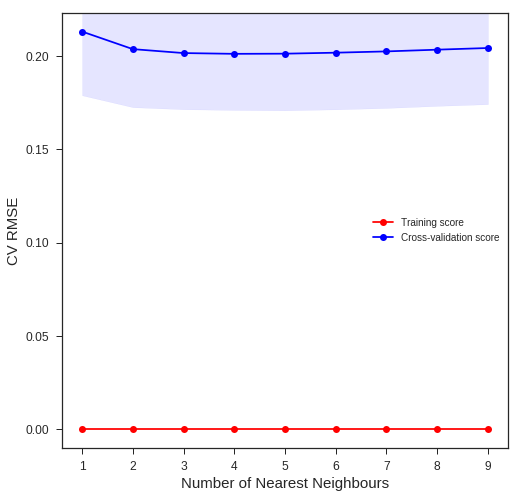

In [24]:
X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
print(X.shape, y.shape)
print("Without standardizing", X.mean())
training_scores, validation_scores = validation_curve(neighbors.KNeighborsRegressor(weights = 'distance'),
                                                      X, y, param_name="n_neighbors", param_range=range(1, 10), cv=5,
                                                      scoring = "neg_mean_squared_error")
plot_validation_rmse_curve(range(1, 10), training_scores, validation_scores)
plt.xlabel("Number of Nearest Neighbours",fontsize = 15)
plt.ylabel("CV RMSE",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=12)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997, 1)
with normal standardizing -3.1075186970160205e-16


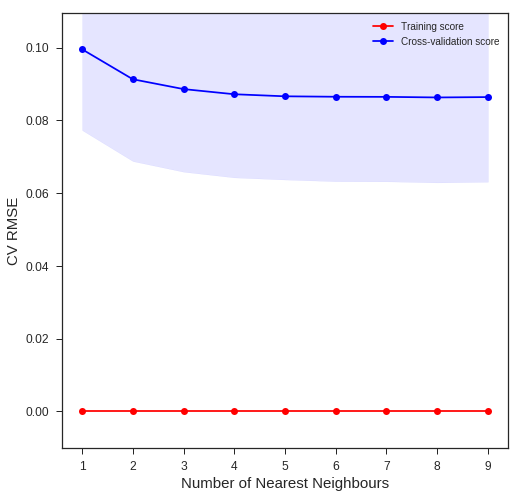

In [25]:
## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
training_scores, validation_scores = validation_curve(neighbors.KNeighborsRegressor(weights = 'distance'),
                                                      X, y, param_name="n_neighbors", param_range=range(1, 10), cv=5,
                                                      scoring = "neg_mean_squared_error")
plot_validation_rmse_curve(range(1, 10), training_scores, validation_scores)
plt.xlabel("Number of Nearest Neighbours",fontsize = 15)
plt.ylabel("CV RMSE",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=12)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997, 1)
With 0-1 standardizing 0.2807787125838118


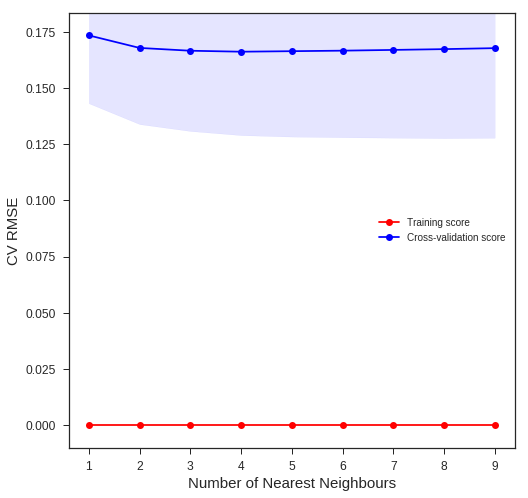

In [26]:
## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
training_scores, validation_scores = validation_curve(neighbors.KNeighborsRegressor(weights = 'distance'),
                                                      X, y, param_name="n_neighbors", param_range=range(1, 10), cv=5,
                                                      scoring = "neg_mean_squared_error")
plot_validation_rmse_curve(range(1, 10), training_scores, validation_scores)
plt.xlabel("Number of Nearest Neighbours",fontsize = 15)
plt.ylabel("CV RMSE",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=12)


Let's See variability by ploting predicted output with original output and comparing them with wind Speed as that is most important Featuer in the modeling.

In [32]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'uniform')

X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
print(X.shape, y.shape)

knn.fit(X,y)

Y_pred = knn.predict(X)
print(Y_pred.shape)

(30997, 11) (30997, 1)
(30997, 1)


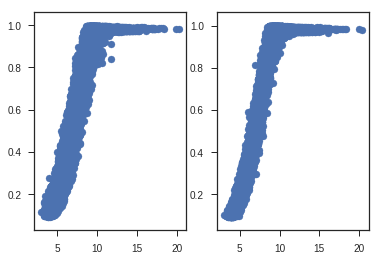

In [29]:
fig , ax = plt.subplots(1,2)
ax[0].scatter(y = Y_pred, x= X[:,0])
ax[1].scatter(y= y , x =X[:,0]);

Exploring Residuals of this model prediction.
This also explain important finding about the model as well as relationship between the predictor as well as true response

In [31]:
plt.scatter(y = y-Y_pred, x = X[:,0], alpha = 0.2);

This explains that at 7.5 m/s is high fluctuation point. That is where increase in the speed implied more increase in the power output.

Let's see if we use weight as distance. If that can solve the problem of this change point.

In [34]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'distance')

X = np.array(xtrain.values)
y = np.array(ytrain.values.reshape(30997,1))
print(X.shape, y.shape)


knn.fit(X,y)

Y_pred = knn.predict(X)
print(Y_pred.shape)

fig , ax = plt.subplots(1,2)
ax[0].scatter(y = Y_pred, x= X[:,0])
ax[1].scatter(y= y , x =X[:,0]);

(30997, 11) (30997, 1)
(30997, 1)


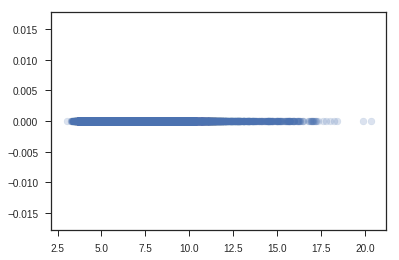

In [36]:
plt.scatter(y = y-Y_pred, x = X[:,0], alpha = 0.2);

Wow!. The distance based method quickly overfits the models and does not  have any residuls. This Explains an important differance between two weight arguments.

Let's Use Holdout set and see the prediction vs True Power Average Graph.

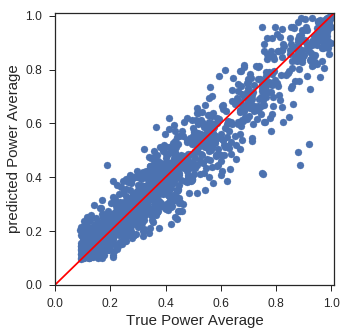

In [40]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 2, weights = 'distance')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

plt.figure(figsize = (5,5))
plt.scatter(y_test, pred)
plt.xlim(0,1.01)
plt.ylim(0,1.01)
plt.plot([0,2.5],[0,2.5],'r')
plt.xlabel("True Power Average",fontsize = 15)
plt.ylabel("predicted Power Average",fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=12);

This is better than the linear regression but still performs not upto the International Standard.

Still KNN could not beat the IEC Bining methods. There are other regression methods can be explored. 
Support Vector Regression uses unique cost function that allows model to use small data (Support Vectors) that can be used to faster predictive modeling. As well as the Kernel Trick allows SVM to use non linear modeling reltionsip using different kernel function that can be explain more below.

# Support Vector Regression

In [0]:
from sklearn.svm import SVR
lin = SVR(kernel = 'rbf', C=1e3, cache_size=7000)
rbf = SVR(kernel = 'linear', C=1e3,cache_size=7000)
pol = SVR(kernel = 'poly', C=1e3,  degree = 3,cache_size=7000)
sig = SVR(kernel = 'sigmoid', C=1e3,cache_size=7000)



In [8]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)

score = cross_val_score(lin, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("lin_cv_rmse",np.mean(np.sqrt(np.abs(score))))


(30997, 11) (30997,)


In [0]:
score = cross_val_score(rbf, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("rbf_cv_rmse",np.mean(np.sqrt(np.abs(score))))


In [0]:
score = cross_val_score(pol, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("pol_cv_rmse",np.mean(np.sqrt(np.abs(score))))


In [0]:
score = cross_val_score(sig, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("sig_cv_rmse",np.mean(np.sqrt(np.abs(score))))

This is also distance based method so we can see that we will find improvement in the prediction using the scaliing the input features.

In [0]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
print("Without standardizing", X.mean())

## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())

X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())

In [0]:
print(np.arange(1,10))

[1 2 3 4 5 6 7 8 9]


In [0]:
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

cv_rmse 0.12694513074


Let's Look at Validation Curve of this model for different value of C.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
with normal standardizing -3.1075186970160205e-16


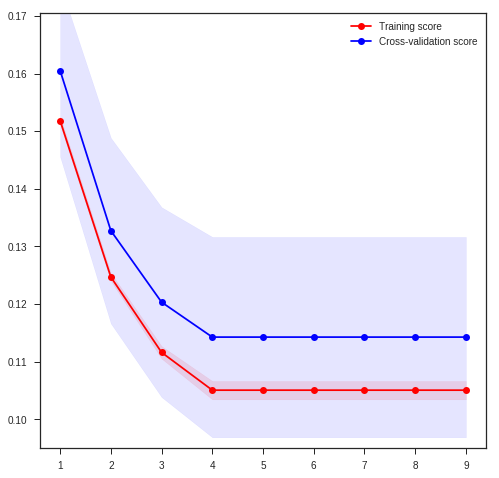

In [10]:
## with standardizing the data
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
clist = [0.001,0.01,0.1,1,10,100,1000,10000,100000]
training_scores, validation_scores = validation_curve(SVR(epsilon=0.2), 
                                                      X, y, param_name="C", param_range=clist, cv=10,
                                                      scoring ="neg_mean_squared_error" )
plot_validation_rmse_curve(range(1, 10), training_scores, validation_scores)

# Trees

Tree is also one of the method that we explored. Tree uses binary partitioning feature space into regions. And in those homogeneous region it makes predictions based on the Average response.

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dtr = DecisionTreeRegressor(max_depth = 3)

X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)

dtr.fit(X, y)




(30997, 11) (30997,)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

First we have exploed the most important partition find by the tree. It is also one of the most important exploratory analysis factor. This will quantificationaly determined what kind of non linear relationship is there in the data as well as what is high fluctuation point in the dataset.

In [6]:
!pip install graphviz

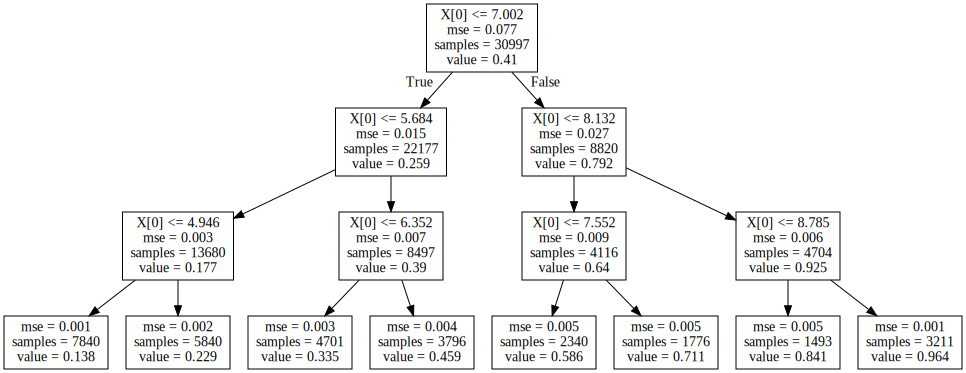

In [5]:
from IPython.display import SVG
from graphviz import Source
graph = Source(tree.export_graphviz(dtr, out_file=None))
SVG(graph.pipe(format='svg'))

After this we wanted to explore more on the Tree based model. We let the default sklearn parameters to find important relationship in the data. 

In [8]:
dtr = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=5)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(dtr, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("tree_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
score = cross_val_score(dtr, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("tree_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
score = cross_val_score(dtr, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("tree_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)


(30997, 11) (30997,)
tree_cv_rmse 4.15312571887108 +_ 0.568907710351672
(30997, 11) (30997,)
with normal standardizing -3.1075186970160205e-16


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


tree_cv_rmse 4.162077871903623 +_ 0.5737025503567827
(30997, 11) (30997,)
With 0-1 standardizing 0.2807787125838118


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


tree_cv_rmse 4.119382852183975 +_ 0.4744438634461891


The tree based model relly performs well, But when we plot the Decision tree, It only explored the windspeed and Power_avg relationship. It did not utilize the other enviromental factors or other weak predictors. That's why we did not explore more on Decision tree.

# Gaussian Process Regression

We wanted to try Gaussian Process Regression on this data set. Due to unscalabilty of Gaussian Process on Multivariate large data, We could not get final results

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
print(X.shape, y.shape)

#gp.fit(X, y)


y_pred, sigma = gp.predict(x, return_std=True)

# Neural Network

Neural Network is exciting field in current scenario. Not only neural network did beat other methods in terms of prediction accuracy. But, also it opened the new frontiers (domains) that were not explored before.

- Here, 2 types of neural netwok we tried to implement
 - Wide model
 - Deep Model
 
Wide or deep model in terms of Structure. This is best way to asses what kind of model structure would best fit the data.

Implementation of neural network is done by utilizing Keras library. Keras is fast and higher level language written on top of Tensorflow for specifically Neural network's implementation

In [0]:
#loading Libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten	
from sklearn import  metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow import set_random_seed
#seeding 1001
seed = 1001
np.random.seed(seed) #for numpy
set_random_seed(seed) #for Tensorflow 

In [0]:
def wide_model():
    model = Sequential()
    model.add(Dense(5,activation='relu',  input_dim = 5,kernel_initializer='normal'))
    model.add(Dense(128, activation='relu',kernel_initializer='normal'))
    model.add(Dense(128, activation='relu',kernel_initializer='normal'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# we can add dropout
# we can use deeper model
# differant activation function, optimizer, loss
# grid search
def deep_model():
    model = Sequential()
    model.add(Dense(5,activation='relu',  input_dim = 5,kernel_initializer='normal'))
    model.add(Dense(64, activation='relu',kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu',kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu',kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu',kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu',kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu',kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu',kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu',kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [0]:
estimator = KerasRegressor(build_fn=wide_model, epochs=5, batch_size=32, verbose=0)
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
score = cross_val_score(estimator, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("wide_cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 5) (30997,)
with normal standardizing -6.572468729139462e-16
Epoch 1/10
27897/27897 [==============================] - 5s 162us/step - loss: 0.0108
Epoch 2/10
27897/27897 [==============================] - 4s 155us/step - loss: 0.0013
Epoch 3/10
27897/27897 [==============================] - 4s 151us/step - loss: 0.0012
Epoch 4/10
27897/27897 [==============================] - 4s 151us/step - loss: 0.0012
Epoch 5/10
 6000/27897 [=====>........................] - ETA: 3s - loss: 0.001227897/27897 [==============================] - 4s 147us/step - loss: 0.0012
Epoch 6/10
27897/27897 [==============================] - 4s 149us/step - loss: 0.0012
Epoch 7/10
27897/27897 [==============================] - 4s 150us/step - loss: 0.0012
Epoch 8/10
27897/27897 [==============================] - 4s 153us/step - loss: 0.0012
Epoch 9/10
27897/27897 [==============================] - 4s 152us/step - loss: 0.0012
Epoch 10/10
3100/3100 [==============================] - 0s 42us/step
Epoch 1/1

In [10]:
estimator = KerasRegressor(build_fn=deep_model, epochs=5, batch_size=50, verbose=0)
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
score = cross_val_score(estimator, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("wide_cv_rmse",np.mean(np.sqrt(np.abs(score))))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 5) (30997,)
with normal standardizing 2.6040473201389612e-17
wide_cv_rmse 0.18771070313783228


- Neural network quickly overfits the dataset.
- This explains that we don't need this complicated model for this small number of instances.
- To better understand this we can have more data and design specific architecture that suits the given problem

# Boosting

- Boosting is one of exciting method of ensemble group, which always perform good even with the weak predictors.
- That's kind of advantage we wanted to have for this Data.
- Here, we have explored Boosting methods in terms of predictove power capacity.

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')

In [12]:
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
score = cross_val_score(est, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("gbm_cv_rmse",np.mean(np.sqrt(np.abs(score))*100),"+_",np.std(np.sqrt(np.abs(score)))*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 5) (30997,)
with normal standardizing 2.6040473201389612e-17
gbm_cv_rmse 3.636749602245607 +_ 0.5154581121986236


In [13]:
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
score = cross_val_score(est, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("gbm_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 5) (30997,)
With 0-1 standardizing 0.30158108507520937
gbm_cv_rmse 3.636763187418378 +_ 0.5154552201796808


In [14]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
score = cross_val_score(est, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("gbm_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
With 0-1 standardizing 0.2807787125838118
gbm_cv_rmse 3.611185289308151 +_ 0.5517177671875602


In [15]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
score = cross_val_score(est, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("gbm_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
with normal standardizing -3.1075186970160205e-16
gbm_cv_rmse 3.611189280061279 +_ 0.5517294800543622


In [16]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
score = cross_val_score(est, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("gbm_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
with normal standardizing -3.1075186970160205e-16
gbm_cv_rmse 3.611189280061279 +_ 0.5517294800543622


In [17]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(est, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("gbm_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 11) (30997,)
gbm_cv_rmse 3.611162358278388 +_ 0.5516909141631348


# RandomFOrest

- Randomforest is also one of the ensemble methods that uses it;s tree based method to use low of large numbers.
- Like, Averaging results of large number of trees, We would be able to adeptively optimize our model for this specific data.

In [0]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=100, min_samples_split=2,
                                max_features='auto', min_impurity_decrease=0.0, min_impurity_split=None)

In [19]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(RF, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("RF_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 11) (30997,)
RF_cv_rmse 3.244142694845781 +_ 0.5199575293441241


In [20]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
score = cross_val_score(RF, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("RF_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
score = cross_val_score(RF, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("RFcv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
with normal standardizing -3.1075186970160205e-16
RF_cv_rmse 3.245108563074696 +_ 0.5191816705020156
(30997, 11) (30997,)
With 0-1 standardizing 0.2807787125838118


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RFcv_rmse 3.230310646409408 +_ 0.5000188848656671


- We have not dispalyed the Grid serach of randomforest results over here.
- The above parameters are the best parameters of grid search in terms of predictive power.
- But, this method was not able to beat Xgboost. This method is discussed below.

# XgBoost

Xgboost is also called Xtreme Gradiant Boosting Method.

It utilize its fast optimized algorithm to decrease the Run speed of the model.

This also gave user other options to control the model and optimize the parameters according to it.

In [21]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from xgboost.sklearn import XGBRegressor

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [0]:
xgb = XGBRegressor(max_depth = 4, learning_rate = 0.01, n_estimators=500, n_jobs = -1, 
                   gamma = 0, subsample = 0.1, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)

In [23]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 11) (30997,)
XGBR_cv_rmse 3.153224583901619 +_ 0.48335436320782404


In [24]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBRcv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30997, 11) (30997,)
with normal standardizing -3.1075186970160205e-16
XGBR_cv_rmse 3.1535612156914876 +_ 0.4875118709964224
(30997, 11) (30997,)
With 0-1 standardizing 0.2807787125838118


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


XGBRcv_rmse 3.149079730124672 +_ 0.4796493392213919


In [0]:
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score))*100),"+_",np.std(np.sqrt(np.abs(score)))*100)
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBRcv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 5) (30997,)
with normal standardizing 5.02970672626353
XGBR_cv_rmse 3.5477130612990946 +_ 0.9698486423784928
(30997, 5) (30997,)
with normal standardizing -6.572468729139462e-16
XGBR_cv_rmse 3.5476807818197176 +_ 0.9682796564070111
(30997, 5) (30997,)
With 0-1 standardizing 0.32567677933176065
XGBRcv_rmse 3.5479586141773676 +_ 0.9701973077865899


In [0]:
np.arange(0.5,1.6,0.1)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5])

In [0]:
xgb = XGBRegressor(max_depth = 4, learning_rate = 0.01, n_estimators=500, n_jobs = -1, 
                   gamma = 0, subsample = 0.1, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 6) (30997,)
XGBR_cv_rmse 3.508400407845554 +_ 0.9117243210081328


In [0]:
xgb = XGBRegressor(max_depth = 5, learning_rate = 0.01, n_estimators=500, n_jobs = -1, 
                   gamma = 0, subsample = 0.1, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 6) (30997,)
XGBR_cv_rmse 3.4924094616178665 +_ 0.9117622486175808


In [0]:
xgb = XGBRegressor(max_depth = 5, learning_rate = 0.01, n_estimators=600, n_jobs = -1, 
                   gamma = 0, subsample = 0.1, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 6) (30997,)
XGBR_cv_rmse 3.4808191193282587 +_ 0.9176527007764099


In [0]:
xgb = XGBRegressor(max_depth = 7, learning_rate = 0.01, n_estimators=600, n_jobs = -1, 
                   gamma = 0, subsample = 0.1, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 6) (30997,)
XGBR_cv_rmse 3.4966050684232663 +_ 0.9353799618274887


In [0]:
xtrain.columns

Index(['WindSpeed', 'WindSpeed_Std', 'WindDirection', 'EnvironmentTemperature',
       'terbulance', 'airdensity'],
      dtype='object')

In [0]:
xgb = XGBRegressor(max_depth = 5, learning_rate = 0.01, n_estimators=600, n_jobs = -1, 
                   gamma = 0, subsample = 0.5, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)
X = np.array(xtrain.iloc[:,[0,1,2,3]].values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 4) (30997,)
XGBR_cv_rmse 3.4821410759957048 +_ 0.9197775176051637


In [0]:
xgb = XGBRegressor(max_depth = 5, learning_rate = 0.01, n_estimators=600, n_jobs = -1, 
                   gamma = 0, subsample = 0.5, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 9) (30997,)
XGBR_cv_rmse 3.166055210116324 +_ 0.48374020378751165


In [0]:
xgb = XGBRegressor(max_depth = 7, learning_rate = 0.01, n_estimators=600, n_jobs = -1, 
                   gamma = 0, subsample = 0.5, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 9) (30997,)
XGBR_cv_rmse 3.126981169452546 +_ 0.4761533358889779


In [0]:
xgb = XGBRegressor(max_depth = 6, learning_rate = 0.01, n_estimators=600, n_jobs = -1, 
                   gamma = 0, subsample = 0.5, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 9) (30997,)
XGBR_cv_rmse 3.1380347814857745 +_ 0.4923167831446547


In [0]:
xgb = XGBRegressor(max_depth = 6, learning_rate = 0.1, n_estimators=600, n_jobs = -1, 
                   gamma = 0, subsample = 0.5, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5,tree_method = 'exact')
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 9) (30997,)
XGBR_cv_rmse 3.262887111670407 +_ 0.5143412356515775


In [0]:
xgb = XGBRegressor(max_depth = 6, learning_rate = 0.1, n_estimators=600, n_jobs = -1, 
                   gamma = 0, subsample = 0.5, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5,tree_method = 'exact')
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
score = cross_val_score(xgb, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("XGBR_cv_rmse",np.mean(np.sqrt(np.abs(score)))*100,"+_",np.std(np.sqrt(np.abs(score)))*100)

(30997, 11) (30997,)
XGBR_cv_rmse 3.09684509202 +_ 0.575241684868


## Validation Curve

In [0]:
from sklearn.learning_curve import validation_curve
def plot_validation_rmse_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(np.sqrt(np.abs(train_scores)), axis=1)
    train_scores_std = np.std(np.sqrt(np.abs(train_scores)), axis=1)
    validation_scores_mean = np.mean(np.sqrt(np.abs(validation_scores)), axis=1)
    validation_scores_std = np.std(np.sqrt(np.abs(validation_scores)), axis=1)
    plt.figure(figsize = (8,6))
    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(train_scores_mean.min()-0.01, validation_scores_mean.max()+0.01)
    plt.legend(loc="best")

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


(30997, 6) (30997,)


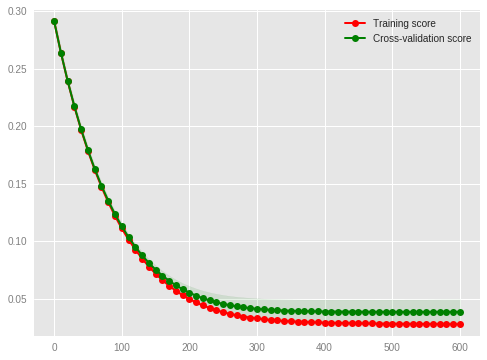

In [0]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
xgb = XGBRegressor(max_depth = 5, learning_rate = 0.01, n_jobs = -1, 
                   gamma = 0, subsample = 0.1, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)
training_scores, validation_scores = validation_curve(xgb,
                                                      X, y, param_name="n_estimators", param_range=np.arange(0,610,10), cv=5,
                                                      scoring = "neg_mean_squared_error")
plot_validation_rmse_curve(np.arange(0,610,10), training_scores, validation_scores)

In [0]:
np.sqrt(np.abs(training_scores.max())), np.sqrt(np.abs(validation_scores.max()))

(0.023995905379523844, 0.027586088095028827)

In [0]:
print(range(1,10,2))

range(1, 10, 2)


When using black box machine learning algorithms like random forest and boosting, it is hard to understand the relations between predictors and model outcome. For example, in terms of random forest, all we get is the feature importance. Although we can know which feature is significantly influencing the outcome based on the importance calculation, it really sucks that we don’t know in which direction it is influencing. And in most of the real cases, the effect is non-monotonic. We need some powerful tools to help understanding the complex relations between predictors and model prediction.

- Friedman’s PDP

Friedman’s partial dependence plot aims to visualize the marginal effect of a given predictor towards the model outcome by plotting out the average model outcome in terms of different values of the predictor.

Partial dependence plots show the dependence between the target function and a set of ‘target’ features, marginalizing over the values of all other features (the complement features). Due to the limits of human perception the size of the target feature set must be small (usually, one or two) thus the target features are usually chosen among the most important features.

In [0]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
xgb = XGBRegressor(max_depth = 5, learning_rate = 0.01, n_estimators=600, n_jobs = -1, 
                   gamma = 0, subsample = 0.1, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5)
xgb.fit(X,y)
features = [0, 1, 2, 3, 4,5]
names = xtrain.columns
fig, axs = plot_partial_dependence(xgb, X, features,
                                       feature_names=names,
                                       grid_resolution=50)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
                 'for the California housing dataset')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle


ValueError: ignored

Partial dependece plot within sklearn libraary only works with it's own library function.
Let's define new function to calculate the grid and ploting those data after that

In [0]:
def partial_dependency(bst, X, y, feature_ids = [], f_id = -1):

    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """

    X_temp = X.copy()

    grid = np.linspace(np.percentile(X_temp[:, f_id], 0.1),
                       np.percentile(X_temp[:, f_id], 99.5),
                       50)
    y_pred = np.zeros(len(grid))

    if len(feature_ids) == 0 or f_id == -1:
        print ('Input error!')
        return
    else:
        for i, val in enumerate(grid):

            X_temp[:, f_id] = val
            data = xgb.DMatrix(X_temp, feature_names = df_columns)

            y_pred[i] = np.average(bst.predict(data))

    return grid, y_pred

In [0]:
lst_f = ['full_sq', 'timedelta', 'floor']
for f in lst_f:
    f_id = df_columns.tolist().index(f)


    feature_ids = range(X_train.shape[1])

    grid, y_pred = partial_dependency(model,
                                      X_train,
                                      ylog1p_train,
                                      feature_ids = feature_ids,
                                      f_id = f_id
                                      )

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    plt.subplots_adjust(left = 0.17, right = 0.94, bottom = 0.15, top = 0.9)

    ax.plot(grid, y_pred, '-', color = 'red', linewidth = 2.5, label='fit')
    ax.plot(X_train[:, f_id], ylog1p_train, 'o', color = 'grey', alpha = 0.01)

    ax.set_xlim(min(grid), max(grid))
    ax.set_ylim(0.95 * min(y_pred), 1.05 * max(y_pred))

    ax.set_xlabel(f, fontsize = 24)
    ax.set_ylabel('Partial Dependence', fontsize = 24)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.show()

(30997, 6) (30997,)


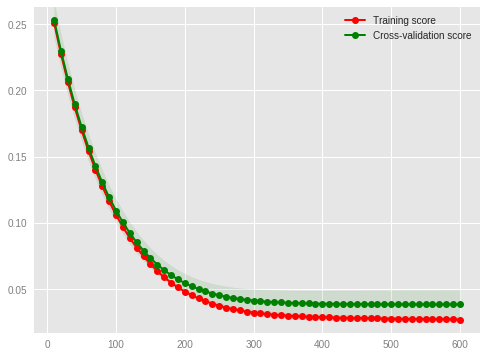

In [0]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
est = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, loss='ls')
training_scores, validation_scores = validation_curve(est,
                                                      X, y, param_name="n_estimators", param_range=np.arange(10,610,10), cv=5,
                                                      scoring = "neg_mean_squared_error")
plot_validation_rmse_curve(np.arange(10,610,10), training_scores, validation_scores)

In [0]:
np.sqrt(np.abs(training_scores.max())), np.sqrt(np.abs(validation_scores.max()))

(0.023489928700476462, 0.027438000899650976)

The partial dependence function basically gives you the "average" trend of that variable (integrating out all others in the model). It's the shape of that trend that is "important". You may interpret the relative range of these plots from different predictor variables, but not the absolute range. Hope that helps.

Text(0.5,0.98,'Partial dependence of power Avg')

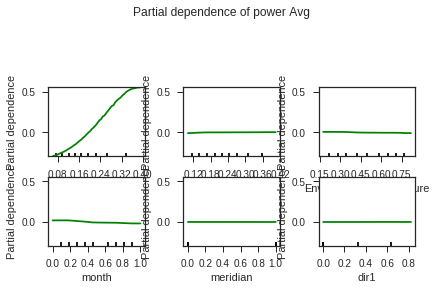

In [25]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
est = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, loss='ls',n_estimators =400)
est.fit(X,y)
features = [0, 1, 2, 3, 4,5]
names = xtrain.columns
fig, axs = plot_partial_dependence(est, X, features,
                                       feature_names=names,
                                       grid_resolution=50)
fig.suptitle('Partial dependence of power Avg')

Each point on the partial dependence plot is the average vote percentage in favor of the "Yes trees" class across all observations, given a fixed level of TRI. Here we also able to see that wind speed is most important featues for prediction of the power. And realtionship captured by those is also very non linear.


Hert we have exploed thee relationship on more weather profile data

Text(0.5,0.98,'Partial dependence of power Avg on weather profile Data')

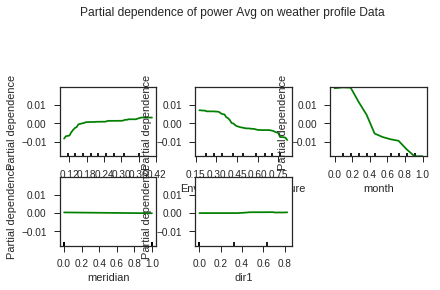

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, loss='ls',n_estimators =400)
est.fit(X,y)
features = [1, 2, 3, 4,5]
names = xtrain.columns
fig, axs = plot_partial_dependence(est, X, features,
                                       feature_names=names,
                                       grid_resolution=50)
fig.suptitle('Partial dependence of power Avg on weather profile Data')

A way to look at y axis values is that they are relative to each other in the other plots. When that number is higher than in the other plots in absolute values, it means it is more important cause the impact of that variable on the output is larger.

Text(0.5,0.98,'Partial dependence of Power Avg on the WInd speed')

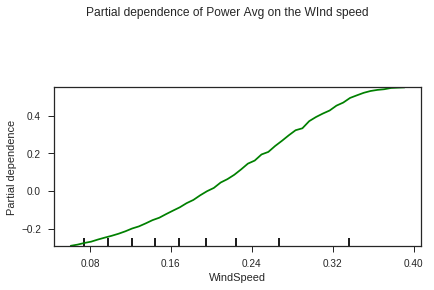

In [27]:
est = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, loss='ls',n_estimators =400)
est.fit(X,y)
features = [0]
names = xtrain.columns
fig, axs = plot_partial_dependence(est, X, features,
                                       feature_names=names,
                                       grid_resolution=50)
fig.suptitle('Partial dependence of Power Avg on the WInd speed')

Text(0.5,0.98,'Partial dependence of Power avg on the Wind Speed, Environment Temp')

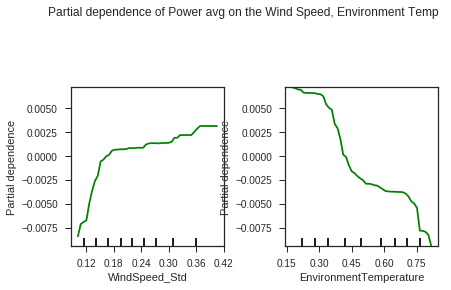

In [30]:
est = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, loss='ls',n_estimators =400)
est.fit(X,y)
features = [1, 2]
names = xtrain.columns
fig, axs = plot_partial_dependence(est, X, features,
                                       feature_names=names,
                                       grid_resolution=50)
fig.suptitle('Partial dependence of Power avg on the Wind Speed, Environment Temp')

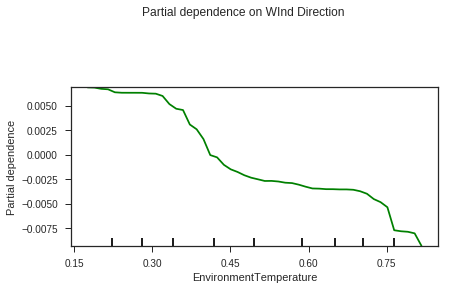

In [29]:
est = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, loss='ls',n_estimators =400)
est.fit(X,y)
features = [ 2]
names = xtrain.columns
fig, axs = plot_partial_dependence(est, X, features,
                                       feature_names=names,
                                       grid_resolution=50)
fig.suptitle('Partial dependence on Environment Temp');

In [0]:
xtrain.columns

Index(['WindSpeed', 'WindSpeed_Std', 'WindDirection', 'EnvironmentTemperature',
       'terbulance', 'airdensity'],
      dtype='object')

Text(0.5,0.98,'Partial dependence of power Avg on other features')

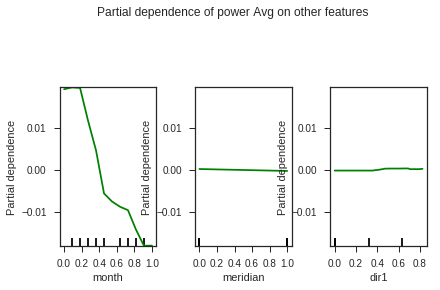

In [31]:
est = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, loss='ls',n_estimators =400)
est.fit(X,y)
features = [3, 4,5]
names = xtrain.columns
fig, axs = plot_partial_dependence(est, X, features,
                                       feature_names=names,
                                       grid_resolution=50)
fig.suptitle('Partial dependence of power Avg on other features')

In [0]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
  Running setup.py bdist_wheel for pdpbox ... done
  Stored in directory: /content/.cache/pip/wheels/16/89/b4/336be8a5baaf9dadd8140adbd5f1c1555423e9be1dd9395361
Successfully built pdpbox


In [0]:
from pdpbox import pdp

In [0]:
xtrain.columns

Index(['WindSpeed', 'WindSpeed_Std', 'WindDirection', 'EnvironmentTemperature',
       'terbulance', 'airdensity'],
      dtype='object')

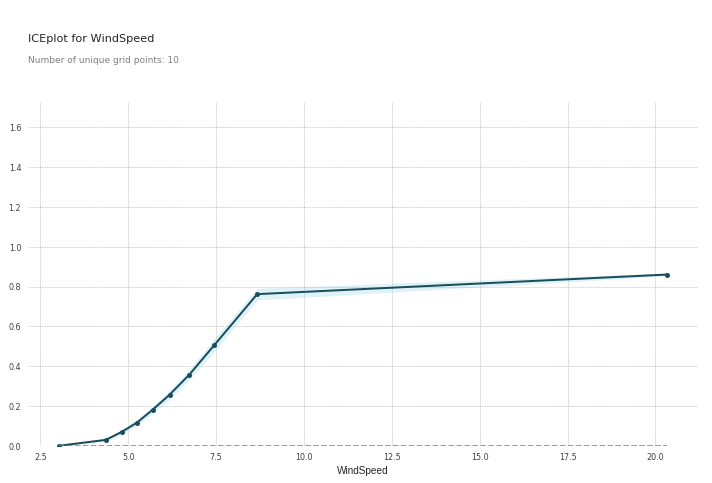

In [0]:
pdp_weekofyear = pdp.pdp_isolate(est, xtrain, 'WindSpeed')
pdp.pdp_plot(pdp_weekofyear, 'WindSpeed', figsize=(12, 8))

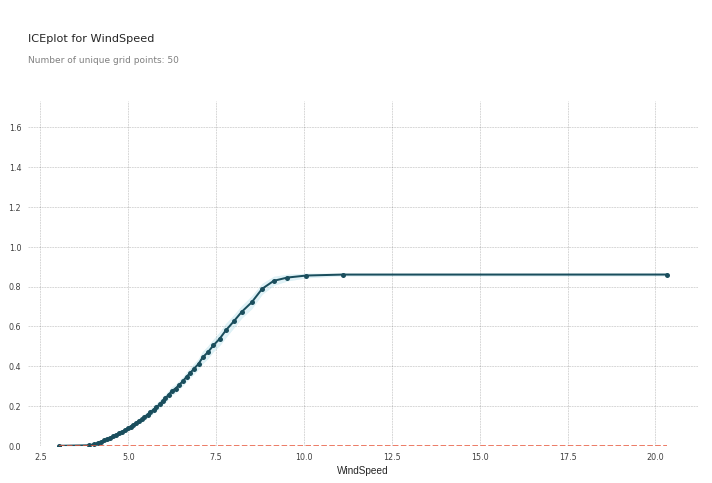

In [0]:
pdp_weekofyear = pdp.pdp_isolate(est, xtrain, 'WindSpeed',num_grid_points =50)
pdp.pdp_plot(pdp_weekofyear, 'WindSpeed', figsize=(12, 8))

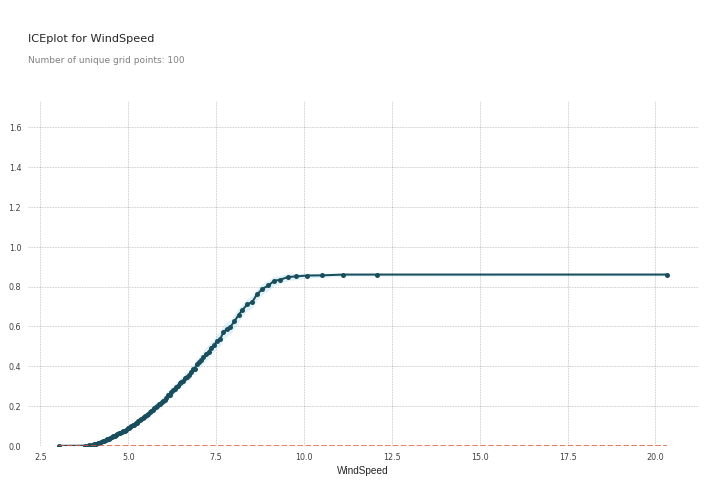

In [0]:
pdp_weekofyear = pdp.pdp_isolate(est, xtrain, 'WindSpeed',num_grid_points =100)
#pdp_weekofyear = pdp.pdp_isolate(model, train_X, feature, num_grid_points=10, grid_type='percentile', percentile_range=None, grid_range=None, cust_grid_points=None, n_jobs=1, predict_kwds={})
pdp.pdp_plot(pdp_weekofyear, 'WindSpeed', figsize=(12, 8))

In [0]:
!pip install pycebox

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
  Running setup.py bdist_wheel for pycebox ... done
  Stored in directory: /content/.cache/pip/wheels/58/5e/65/001126ca8b1f5c71e9571d09ba579e82bb0792062e7a82e77c
Successfully built pycebox


In [0]:
from matplotlib.cm import PuOr
from pycebox.ice import ice, ice_plot

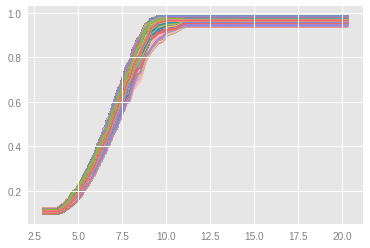

In [0]:
ice_df = ice(xtrain, 'WindSpeed', est.predict, num_grid_points=100)
ice_plot(ice_df);
#@, frac_to_plot=0.1,
#         plot_points=True, point_kwargs={'color': 'k', 'alpha': 0.75});

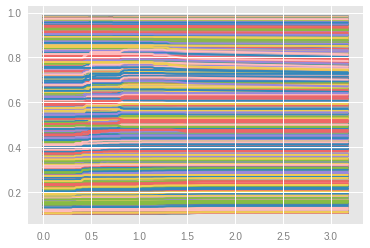

In [0]:
ice_df = ice(xtrain, 'WindSpeed_Std', est.predict, num_grid_points=100)
ice_plot(ice_df);

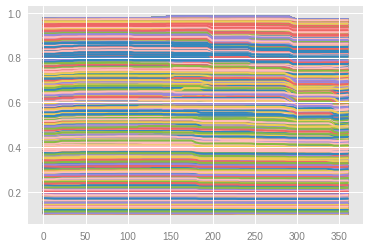

In [0]:
ice_df = ice(xtrain, 'WindDirection', est.predict, num_grid_points=100)
ice_plot(ice_df);

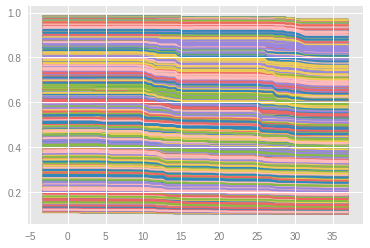

In [0]:
ice_df = ice(xtrain, 'EnvironmentTemperature', est.predict, num_grid_points=100)
ice_plot(ice_df);

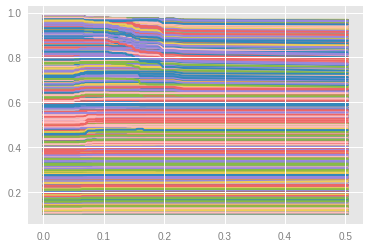

In [0]:
ice_df = ice(xtrain, 'terbulance', est.predict, num_grid_points=100)
ice_plot(ice_df);

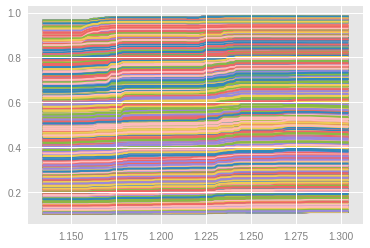

In [0]:
ice_df = ice(xtrain, 'airdensity', est.predict, num_grid_points=100)
ice_plot(ice_df);

## Grid Search

- Grid Search is best way to optimisze the parameters for the given model.
- Grid search also enables you to understand the parameters and it affects on the predictions. 
- This fact explain alot about the models and helps us to understand more about the realtionships in the data set.

In [0]:
xgbr = XGBRegressor(n_jobs = -1, gamma = 0, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5, eval_metric = 'rmse', seed = 101)
param = {'max_depth' : [2,3,4,5,6],
         'learning_rate' : np.arange(0.01,0.25,0.05),
         'n_estimators' : np.arange(50,550,50),
         'subsample' : np.arange(0.5,1,0.1),
         'colsample_bytree' : [0.5,0.6,0.7,0.8,0.9,1]        
         
}

In [0]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
gs = RandomizedSearchCV(xgbr, param, n_iter = 10, scoring = "neg_mean_squared_error", cv = 10,random_state = 101)
gs.fit(X,y)


(30997, 6) (30997,)


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
       seed=101, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6], 'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21]), 'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]), 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9]), 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
          pre_dispatch='2*n_jobs', random_state=101, refit=True,
          scoring='neg_mean_squared_error', verbose=0)

In [0]:

np.sqrt(np.abs(gs.best_score_))*100

3.6781020479419433

In [0]:
gs.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.060000000000000005,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 0.8999999999999999}

In [0]:
gs.grid_scores_

[mean: -0.00143, std: 0.00074, params: {'subsample': 0.8999999999999999, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.21000000000000002, 'colsample_bytree': 0.8},
 mean: -0.00137, std: 0.00070, params: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.060000000000000005, 'colsample_bytree': 0.6},
 mean: -0.01292, std: 0.00180, params: {'subsample': 0.6, 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.6},
 mean: -0.00143, std: 0.00075, params: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.11, 'colsample_bytree': 0.9},
 mean: -0.00137, std: 0.00070, params: {'subsample': 0.8999999999999999, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.11, 'colsample_bytree': 0.5},
 mean: -0.00144, std: 0.00074, params: {'subsample': 0.6, 'n_estimators': 450, 'max_depth': 4, 'learning_rate': 0.21000000000000002, 'colsample_bytree': 0.9},
 mean: -0.00137, std: 0.00069, params: {'subsample': 0.6, 'n

In [0]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
gs = RandomizedSearchCV(xgbr, param, n_iter = 25, scoring = "neg_mean_squared_error", cv = 10,random_state = 111)
gs.fit(X,y)

(30997, 6) (30997,)


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
       seed=101, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=25, n_jobs=1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6], 'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21]), 'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]), 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9]), 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
          pre_dispatch='2*n_jobs', random_state=111, refit=True,
          scoring='neg_mean_squared_error', verbose=0)

In [0]:
gs.grid_scores_

[mean: -0.00250, std: 0.00054, params: {'subsample': 0.8999999999999999, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8},
 mean: -0.00134, std: 0.00068, params: {'subsample': 0.5, 'n_estimators': 250, 'max_depth': 2, 'learning_rate': 0.16000000000000003, 'colsample_bytree': 1},
 mean: -0.00172, std: 0.00068, params: {'subsample': 0.8999999999999999, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.16000000000000003, 'colsample_bytree': 0.6},
 mean: -0.00138, std: 0.00071, params: {'subsample': 0.5, 'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.21000000000000002, 'colsample_bytree': 0.8},
 mean: -0.00137, std: 0.00070, params: {'subsample': 0.7, 'n_estimators': 350, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'colsample_bytree': 0.8},
 mean: -0.00145, std: 0.00074, params: {'subsample': 0.7999999999999999, 'n_estimators': 450, 'max_depth': 5, 'learning_rate': 0.21000000000000002, 'colsample_bytree': 1},
 mean: -0.00145, std

In [0]:
np.sqrt(np.abs(gs.best_score_))*100

3.653188512279363

In [0]:
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
gs = RandomizedSearchCV(xgbr, param, n_iter = 50, scoring = "neg_mean_squared_error", cv = 10,random_state = 1010)
gs.fit(X,y)

(30997, 6) (30997,)


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
       seed=101, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6], 'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21]), 'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]), 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9]), 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
          pre_dispatch='2*n_jobs', random_state=1010, refit=True,
          scoring='neg_mean_squared_error', verbose=0)

In [0]:
np.sqrt(np.abs(gs.best_score_))*100

3.613973159306348

In [0]:
gs.grid_scores_

[mean: -0.00145, std: 0.00067, params: {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.060000000000000005, 'colsample_bytree': 0.6},
 mean: -0.04243, std: 0.00282, params: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.5},
 mean: -0.00143, std: 0.00073, params: {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.16000000000000003, 'colsample_bytree': 1},
 mean: -0.00133, std: 0.00071, params: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.060000000000000005, 'colsample_bytree': 1},
 mean: -0.00137, std: 0.00071, params: {'subsample': 0.8999999999999999, 'n_estimators': 450, 'max_depth': 3, 'learning_rate': 0.21000000000000002, 'colsample_bytree': 0.9},
 mean: -0.00132, std: 0.00069, params: {'subsample': 0.6, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.11, 'colsample_bytree': 1},
 mean: -0.00198, std: 0.00058, params: {'subsample': 0.7, 'n_estima

In [0]:
xgbr = XGBRegressor(n_jobs = -1, gamma = 0, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5, eval_metric = 'rmse', seed = 101)
param = {'max_depth' : [2,3,4,5,6],
         'learning_rate' : np.arange(0.01,0.25,0.05),
         'n_estimators' : np.arange(150,550,50),      
         
}
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
gs = RandomizedSearchCV(xgbr, param, n_iter = 50, scoring = "neg_mean_squared_error", cv = 10,random_state = 1010)
gs.fit(X,y)

(30997, 6) (30997,)


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
       seed=101, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6], 'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21]), 'n_estimators': array([150, 200, 250, 300, 350, 400, 450, 500])},
          pre_dispatch='2*n_jobs', random_state=1010, refit=True,
          scoring='neg_mean_squared_error', verbose=0)

In [0]:
xgbr = XGBRegressor(n_jobs = -1, gamma = 0, reg_alpha=0, reg_lambda = 0, 
                   base_score = 0.5, eval_metric = 'rmse', seed = 101)
param = {'max_depth' : [2,3,4,5,6],
         'learning_rate' : np.arange(0.01,0.25,0.05),
         'n_estimators' : np.arange(150,550,50),      
         
}
X = np.array(xtrain.values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
gs = RandomizedSearchCV(xgbr, param, n_iter = 50, scoring = "neg_mean_squared_error", cv = 10,random_state = 1010)
gs.fit(X,y)

In [0]:
np.sqrt(np.abs(gs.best_score_))*100

3.6053226212538174

In [0]:

gs.grid_scores_

[mean: -0.00139, std: 0.00072, params: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.21000000000000002},
 mean: -0.00135, std: 0.00071, params: {'n_estimators': 450, 'max_depth': 5, 'learning_rate': 0.060000000000000005},
 mean: -0.00132, std: 0.00070, params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.11},
 mean: -0.00133, std: 0.00070, params: {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01},
 mean: -0.00131, std: 0.00069, params: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01},
 mean: -0.00132, std: 0.00068, params: {'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.060000000000000005},
 mean: -0.00135, std: 0.00070, params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.21000000000000002},
 mean: -0.00135, std: 0.00072, params: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.16000000000000003},
 mean: -0.00147, std: 0.00074, params: {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.21000000000000002},

This optimise results are used to calculate exact results in earlier tab

# Bagged KNN

Bagging Is also one of frontier methods in ensemble methods that gives good predictions in terms of predictive power. 
But, Initial idea of bagging is to reduce the variance of the method. It, does not affect the 

In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn import neighbors

In [0]:
print("Without wind Direction")
print("=="*20)
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
print("Without standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
bnn= BaggingRegressor(base_estimator=knn, n_estimators=25, max_samples=0.8, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0)
score = cross_val_score(bnn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

Without wind Direction
(30997, 5) (30997,)
Without standardizing 5.02970672626353
cv_rmse 0.040551775921934374


A way to look at y axis values is that they are relative to each other in the other plots. When that number is higher than in the other plots in absolute values, it means it is more important cause the impact of that variable on the output is larger.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting. If samples are drawn with replacement, then the method is known as Bagging. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces. Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches.

In [0]:
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
print("Without standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
bnn= BaggingRegressor(base_estimator=knn, n_estimators=25, max_samples=0.8, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0)
score = cross_val_score(bnn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


## with standardizing the data
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
bnn= BaggingRegressor(base_estimator=knn, n_estimators=25, max_samples=0.8, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0)
score = cross_val_score(bnn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


## with standardizing the data
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
bnn= BaggingRegressor(base_estimator=knn, n_estimators=25, max_samples=0.8, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0)
score = cross_val_score(bnn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 5) (30997,)
Without standardizing 5.02970672626353
cv_rmse 0.04054362714171546
(30997, 5) (30997,)
with normal standardizing -6.572468729139462e-16
cv_rmse 0.03941754686854564
(30997, 5) (30997,)
With 0-1 standardizing 0.32567677933176065
cv_rmse 0.04204714103624224


In [0]:
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
print("Without standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
bnn= BaggingRegressor(base_estimator=knn, n_estimators=25, max_samples=0.8, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0)
score = cross_val_score(bnn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


## with standardizing the data
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
bnn= BaggingRegressor(base_estimator=knn, n_estimators=25, max_samples=0.8, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0)
score = cross_val_score(bnn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


## with standardizing the data
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
bnn= BaggingRegressor(base_estimator=knn, n_estimators=25, max_samples=0.8, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0)
score = cross_val_score(bnn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 5) (30997,)
Without standardizing 5.02970672626353
cv_rmse 0.04075242085558589
(30997, 5) (30997,)
with normal standardizing -6.572468729139462e-16
cv_rmse 0.040275648448593195
(30997, 5) (30997,)
With 0-1 standardizing 0.32567677933176065
cv_rmse 0.042534619682705686


In [0]:
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
print(X.shape, y.shape)
print("Without standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'uniform')
bnn= BaggingRegressor(base_estimator=knn, n_estimators=25, max_samples=0.8, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0)
score = cross_val_score(bnn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


## with standardizing the data
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler.fit_transform(X)
print(X.shape, y.shape)
print("with normal standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'uniform')
bnn= BaggingRegressor(base_estimator=knn, n_estimators=25, max_samples=0.8, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0)
score = cross_val_score(bnn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))


## with standardizing the data
X = np.array(xtrain.iloc[:,[0,1,3,4,5]].values)
y = np.array(ytrain.values)
X = scaler2.fit_transform(X)
print(X.shape, y.shape)
print("With 0-1 standardizing", X.mean())
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'uniform')
bnn= BaggingRegressor(base_estimator=knn, n_estimators=25, max_samples=0.8, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=None, verbose=0)
score = cross_val_score(bnn, X, y, cv=kf,scoring = "neg_mean_squared_error")
print("cv_rmse",np.mean(np.sqrt(np.abs(score))))

(30997, 5) (30997,)
Without standardizing 5.02970672626353
cv_rmse 0.04074375571413216
(30997, 5) (30997,)
with normal standardizing -6.572468729139462e-16
cv_rmse 0.04016347660635308
(30997, 5) (30997,)
With 0-1 standardizing 0.32567677933176065
cv_rmse 0.042379042403392644


In the original paper about bagging, Breiman refers to this point. He explains that unstable learners are likely to give different prediction for modified datasets and likely to benefit from bagging. On the other hand, stable learners (take to the extreme a constant), will give quite similar predictions anyway so bagging won't help.

Unstability was studied in Breiman's Paper where it was pointed out that neural nets, classication and regression trees, and subset selection in linear regression were unstable,while k-nearest neighbor methods were stable.